<h1/><centre> Weather Analysis between North and South India</centre> </h1>

## A. Gather background information

<ui> Compiling the business background </ui>
> this project is about historical weather around North and South, India , from 1842 to 2023

####  Defining business objectives

####  Make data more accessible and understandable for everyone.

####  Provide fast analytics for the different Factors Affecting Weather .

####  use different prediction and classification algorithms

####  calculating and comparing evaluation measures

#### Programming languages and libraries : python ( Numpy, pandas, matplotlib, seaborn, tensorflow, scikitlearn)

### B. Objective of the project

#### the objective of this project is to analyze the weather data and extract the hypotheses to arrive at a prediction

### C.Data Exploration

#### Exploration is to understand how all these columns are related and the value structures so the correlation between these data

## Import Dataset

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
#Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

#math operations lib 
import math
from math import pi

#date manipulation 
import datetime as dt

# Load  AND Explore 

In [6]:
weather_df = pd.read_csv('input/weather.csv', index_col='SEASON')

In [4]:
weather_df.isnull().sum()

BASIN             0
SUBBASIN          0
NAME              0
ISO_TIME          0
LAT               0
LON               0
DIST2LAND         0
LANDFALL          0
WMO_WIND          0
WMO_PRES          0
NEWDELHI_WIND     0
NEWDELHI_PRES     0
NEWDELHI_DP       0
NEWDELHI_GRADE    0
REUNION_TYPE      0
REUNION_WIND      0
REUNION_PRES      0
REUNION_RMW       0
STORM_SPEED       0
STORM_DIR         0
dtype: int64

In [7]:
weather_df.head()

BASIN SUBBASIN     NAME             ISO_TIME    LAT      LON  \
SEASON                                                                
2015      NI       AS  ASHOBAA  2015-06-06 06:00:00  13.10  68.5000   
2015      NI       AS  ASHOBAA  2015-06-06 09:00:00  13.45  68.5599   
2015      NI       AS  ASHOBAA  2015-06-06 12:00:00  13.80  68.6000   
2015      NI       AS  ASHOBAA  2015-06-06 15:00:00  14.15  68.6075   
2015      NI       AS  ASHOBAA  2015-06-06 18:00:00  14.50  68.6000   

        DIST2LAND  LANDFALL   WMO_WIND    WMO_PRES  NEWDELHI_WIND  \
SEASON                                                              
2015          624     601.0  41.300746  991.222042      40.558118   
2015          597     584.0  41.300746  991.222042      40.558118   
2015          584     571.0  41.300746  991.222042      40.558118   
2015          566     551.0  41.300746  991.222042      40.558118   
2015          551     538.0  41.300746  991.222042      40.558118   

        NEWDELHI_PRES  NEWDELHI_DP NEWDELHI_GRADE REUNION_TYPE  REUNION_WIND  \
SEASON                                                                         
2015       991.873412   991.873412             CS          UNK     43.471802   
2015       991.873412   991.873412             CS          UNK     43.471802   
2015       991.873412   991.873412             CS          UNK     43.471802   
2015       991.873412   991.873412             CS          UNK     43.471802   
2015       991.873412   991.873412             CS          UNK     43.471802   

        REUNION_PRES  REUNION_RMW  STORM_SPEED  STORM_DIR  
SEASON                                                     
2015      989.403054    21.626368            7          8  
2015      989.403054    21.626368            7          8  
2015      989.403054    21.626368            7          3  
2015      989.403054    21.626368            7          0  
2015      989.403054    21.626368            7        358

In [8]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14001 entries, 2015 to 2023
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BASIN           14001 non-null  object 
 1   SUBBASIN        14001 non-null  object 
 2   NAME            14001 non-null  object 
 3   ISO_TIME        14001 non-null  object 
 4   LAT             14001 non-null  float64
 5   LON             14001 non-null  float64
 6   DIST2LAND       14001 non-null  int64  
 7   LANDFALL        14001 non-null  float64
 8   WMO_WIND        14001 non-null  float64
 9   WMO_PRES        14001 non-null  float64
 10  NEWDELHI_WIND   14001 non-null  float64
 11  NEWDELHI_PRES   14001 non-null  float64
 12  NEWDELHI_DP     14001 non-null  float64
 13  NEWDELHI_GRADE  14001 non-null  object 
 14  REUNION_TYPE    14001 non-null  object 
 15  REUNION_WIND    14001 non-null  float64
 16  REUNION_PRES    14001 non-null  float64
 17  REUNION_RMW     14001 non-null  fl

In [9]:
weather_df.describe()

LAT           LON     DIST2LAND      LANDFALL      WMO_WIND  \
count  14001.000000  14001.000000  14001.000000  14001.000000  14001.000000   
mean      -9.761122     83.570322    744.156060    733.505888     41.300746   
std       14.964095     27.427937    725.811736    716.211947     14.632686   
min      -46.900000     11.300000      0.000000      0.000000     10.000000   
25%      -19.000000     63.871400    135.000000    130.000000     40.000000   
50%      -14.180000     81.117400    488.000000    496.000000     41.300746   
75%       -7.700000    101.700000   1273.000000   1235.000000     41.300746   
max       28.700000    162.100000   2804.000000   2777.000000    135.000000   

           WMO_PRES  NEWDELHI_WIND  NEWDELHI_PRES   NEWDELHI_DP  REUNION_WIND  \
count  14001.000000   14001.000000   14001.000000  14001.000000  14001.000000   
mean     991.222042      40.558118     991.873412    991.873412     43.471802   
std       10.415885       8.817758       5.425462      5.425462     13.363635   
min      905.000000      15.000000     920.000000    920.000000     10.000000   
25%      991.222042      40.558118     991.873412    991.873412     43.471802   
50%      991.222042      40.558118     991.873412    991.873412     43.471802   
75%      994.000000      40.558118     991.873412    991.873412     43.471802   
max     1014.000000     130.000000    1006.000000   1006.000000    135.000000   

       REUNION_PRES   REUNION_RMW   STORM_SPEED     STORM_DIR  
count  14001.000000  14001.000000  14001.000000  14001.000000  
mean     989.403054     21.626368      8.260124    204.951789  
std       10.511543      5.534316      5.100116     85.901234  
min      910.000000      4.000000      0.000000      0.000000  
25%      989.403054     21.626368      5.000000    145.000000  
50%      989.403054     21.626368      7.000000    228.000000  
75%      989.403054     21.626368     11.000000    270.000000  
max     1014.000000    125.000000     59.000000    359.000000

# Data Visulization

In [10]:
#Categorical variables:
categorical = weather_df.select_dtypes(include = ["object"]).keys()
print(categorical)

Index(['BASIN', 'SUBBASIN', 'NAME', 'ISO_TIME', 'NEWDELHI_GRADE',
       'REUNION_TYPE'],
      dtype='object')


In [11]:
#Quantitative variables:
quantitative = weather_df.select_dtypes(include = ["int64","float64"]).keys()
print(quantitative)

Index(['LAT', 'LON', 'DIST2LAND', 'LANDFALL', 'WMO_WIND', 'WMO_PRES',
       'NEWDELHI_WIND', 'NEWDELHI_PRES', 'NEWDELHI_DP', 'REUNION_WIND',
       'REUNION_PRES', 'REUNION_RMW', 'STORM_SPEED', 'STORM_DIR'],
      dtype='object')


In [35]:
#'Formatted Date' transformation:

# weather_df['Date'] = pd.to_datetime(weather_df['ISO_TIME'])
# weather_df['year'] = weather_df['Date'].dt.year
# weather_df['month'] = weather_df['Date'].dt.month
# weather_df['day'] = weather_df['Date'].dt.day
# weather_df['hour'] = weather_df['Date'].dt.hour
# weather_df.head()


In [12]:
# Apply the default theme
sns.set_palette('dark:#5A9_r')
sns.set_style("whitegrid")

In [13]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(weather_df[quantitative].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

### Quantitative variables. Missing values

In [14]:
weather_df[quantitative].describe()

LAT           LON     DIST2LAND      LANDFALL      WMO_WIND  \
count  14001.000000  14001.000000  14001.000000  14001.000000  14001.000000   
mean      -9.761122     83.570322    744.156060    733.505888     41.300746   
std       14.964095     27.427937    725.811736    716.211947     14.632686   
min      -46.900000     11.300000      0.000000      0.000000     10.000000   
25%      -19.000000     63.871400    135.000000    130.000000     40.000000   
50%      -14.180000     81.117400    488.000000    496.000000     41.300746   
75%       -7.700000    101.700000   1273.000000   1235.000000     41.300746   
max       28.700000    162.100000   2804.000000   2777.000000    135.000000   

           WMO_PRES  NEWDELHI_WIND  NEWDELHI_PRES   NEWDELHI_DP  REUNION_WIND  \
count  14001.000000   14001.000000   14001.000000  14001.000000  14001.000000   
mean     991.222042      40.558118     991.873412    991.873412     43.471802   
std       10.415885       8.817758       5.425462      5.425462     13.363635   
min      905.000000      15.000000     920.000000    920.000000     10.000000   
25%      991.222042      40.558118     991.873412    991.873412     43.471802   
50%      991.222042      40.558118     991.873412    991.873412     43.471802   
75%      994.000000      40.558118     991.873412    991.873412     43.471802   
max     1014.000000     130.000000    1006.000000   1006.000000    135.000000   

       REUNION_PRES   REUNION_RMW   STORM_SPEED     STORM_DIR  
count  14001.000000  14001.000000  14001.000000  14001.000000  
mean     989.403054     21.626368      8.260124    204.951789  
std       10.511543      5.534316      5.100116     85.901234  
min      910.000000      4.000000      0.000000      0.000000  
25%      989.403054     21.626368      5.000000    145.000000  
50%      989.403054     21.626368      7.000000    228.000000  
75%      989.403054     21.626368     11.000000    270.000000  
max     1014.000000    125.000000     59.000000    359.000000

In [15]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 20, 20
weather_df[quantitative].hist()

array([[<Axes: title={'center': 'LAT'}>, <Axes: title={'center': 'LON'}>,
        <Axes: title={'center': 'DIST2LAND'}>,
        <Axes: title={'center': 'LANDFALL'}>],
       [<Axes: title={'center': 'WMO_WIND'}>,
        <Axes: title={'center': 'WMO_PRES'}>,
        <Axes: title={'center': 'NEWDELHI_WIND'}>,
        <Axes: title={'center': 'NEWDELHI_PRES'}>],
       [<Axes: title={'center': 'NEWDELHI_DP'}>,
        <Axes: title={'center': 'REUNION_WIND'}>,
        <Axes: title={'center': 'REUNION_PRES'}>,
        <Axes: title={'center': 'REUNION_RMW'}>],
       [<Axes: title={'center': 'STORM_SPEED'}>,
        <Axes: title={'center': 'STORM_DIR'}>, <Axes: >, <Axes: >]],
      dtype=object)

<Axes: >

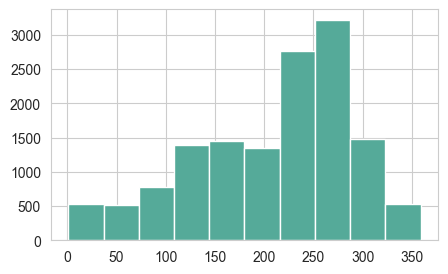

In [16]:
pressure_median = weather_df['STORM_DIR'].median()
      
def pressure(x):
    if x==0:
        return x + pressure_median
    else:
        return x
        
weather_df['STORM_DIR'] = weather_df.apply(lambda row:pressure(row['STORM_DIR']) , axis = 1)

rcParams['figure.figsize'] = 5, 3
weather_df['STORM_DIR'].hist()

In [17]:
rcParams['figure.figsize'] = 10, 30
sns.countplot(y=weather_df['NAME'])


<Axes: xlabel='count', ylabel='NAME'>

In [18]:
weather_df['WMO_WIND'].value_counts(dropna=False)

WMO_WIND
41.300746     7833
25.000000      959
30.000000      791
20.000000      544
35.000000      540
40.000000      499
45.000000      385
50.000000      269
15.000000      231
55.000000      223
60.000000      178
65.000000      131
70.000000      120
80.000000      112
75.000000      107
85.000000       94
90.000000       81
27.000000       73
95.000000       58
23.000000       57
38.000000       56
100.000000      56
32.000000       53
33.000000       52
37.000000       49
28.000000       46
42.000000       40
43.000000       39
47.000000       38
105.000000      35
110.000000      34
22.000000       28
115.000000      26
57.000000       23
10.000000       19
125.000000      16
120.000000      16
48.000000       15
53.000000       13
52.000000       12
130.000000       8
63.000000        6
135.000000       5
58.000000        5
72.000000        4
68.000000        3
62.000000        3
82.000000        3
34.000000        2
92.000000        2
83.000000        2
73.000000        2
77.

In [19]:
weather_df['NAME'].value_counts(dropna=False)

NAME
NOT_NAMED    2013
FREDDY        240
NATHAN        181
CALVINIA      139
URIAH         131
             ... 
GREG           15
HAMOON         15
ASHLEY         13
SITRANG        11
MIDHILI         7
Name: count, Length: 174, dtype: int64

In [20]:
weather_df['BASIN'].value_counts(dropna=False)

BASIN
SI    10326
NI     2916
SP      502
WP      257
Name: count, dtype: int64

In [21]:
sns.countplot(x=weather_df['BASIN'])

<Axes: xlabel='BASIN', ylabel='count'>

<Figure size 1800x800 with 0 Axes>

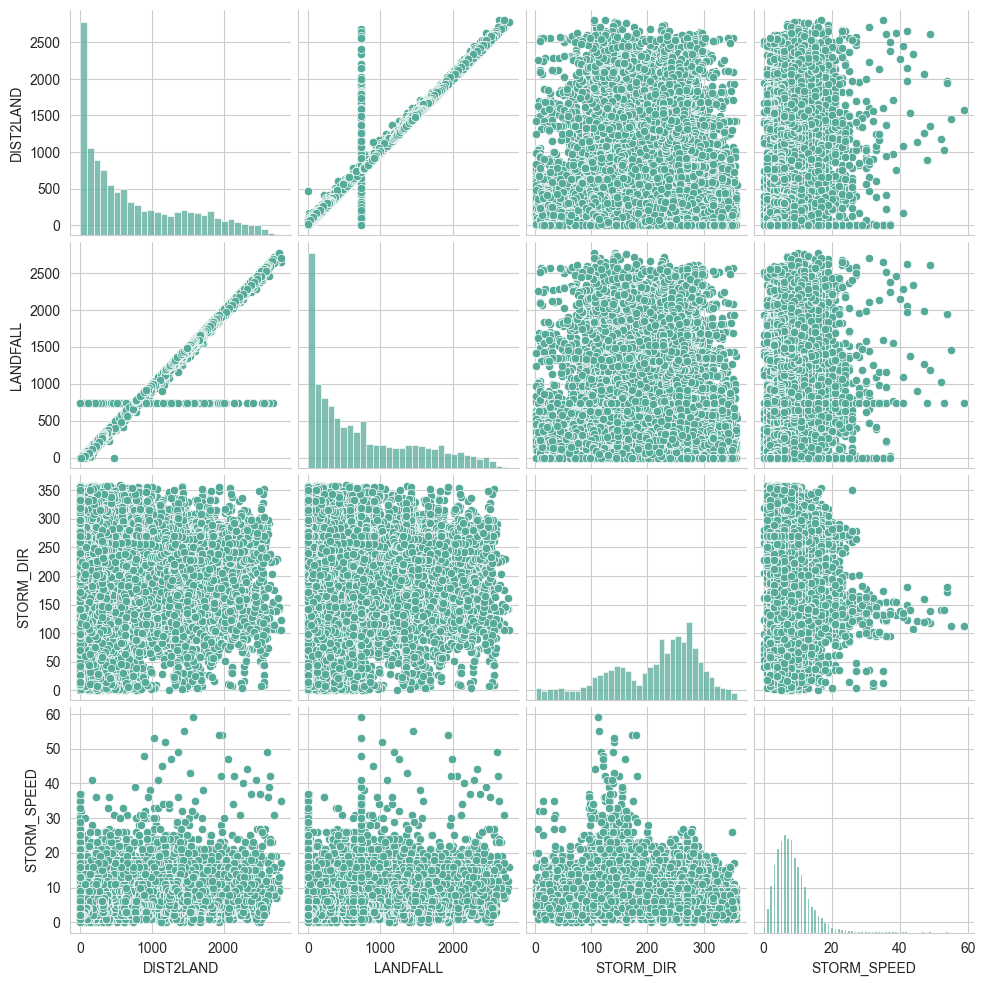

In [22]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
sns.pairplot(weather_df[['DIST2LAND','LANDFALL', 'STORM_DIR', 'STORM_SPEED' ]])
plt.show()

<Figure size 1800x2000 with 0 Axes>

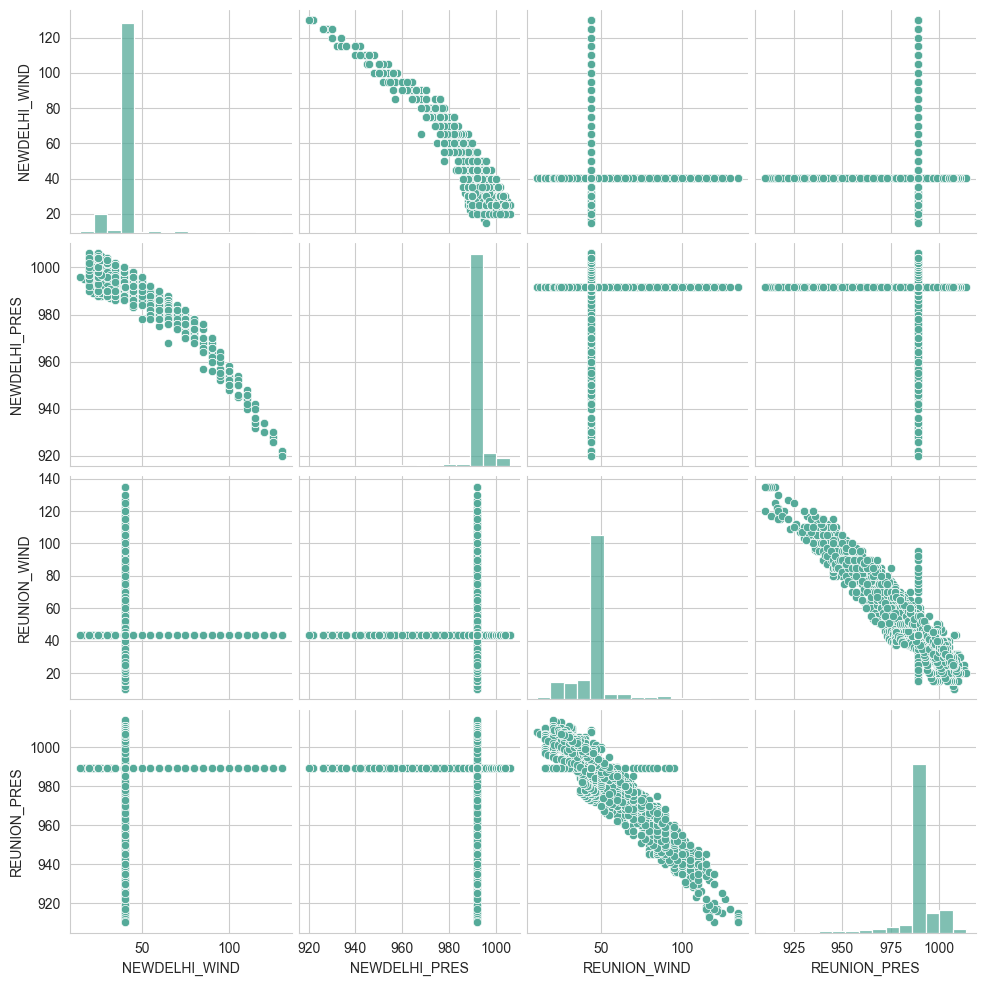

In [23]:
plt.figure(figsize=(18,20)) # this creates a figure 8 inch wide, 4 inch high
sns.pairplot(weather_df[['NEWDELHI_WIND', 'NEWDELHI_PRES', 'REUNION_WIND', 'REUNION_PRES']])
plt.show()

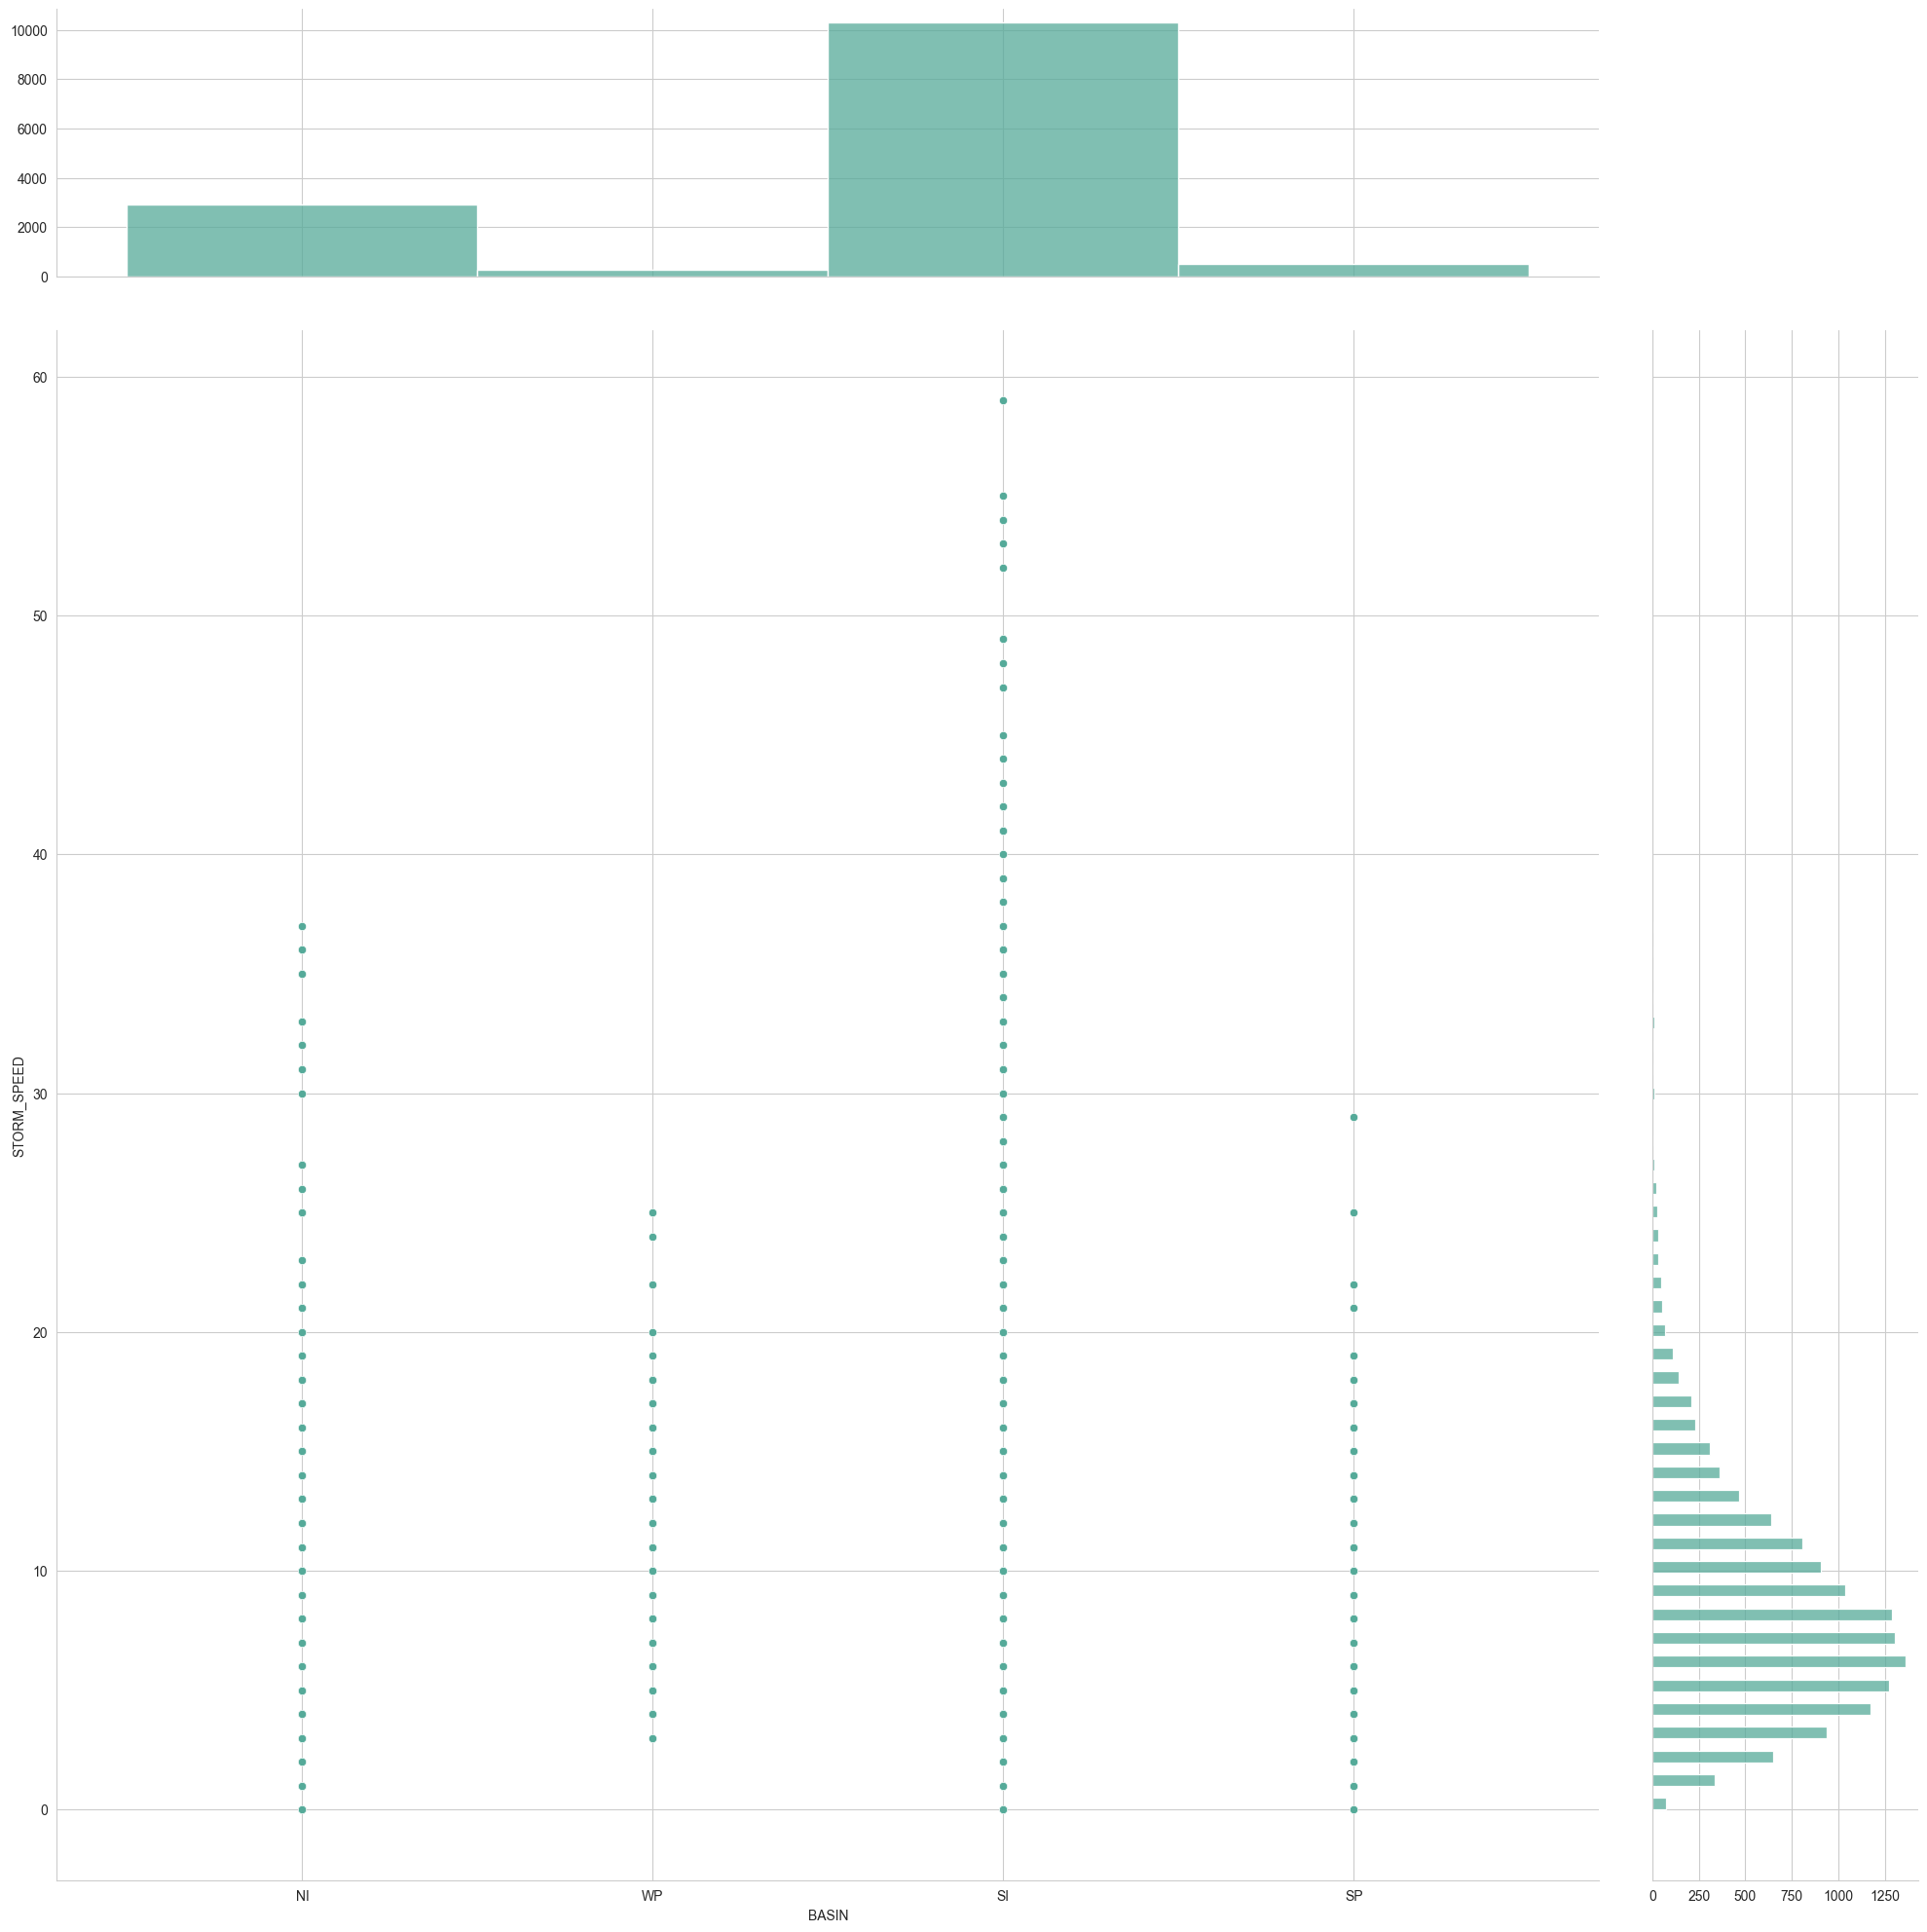

In [40]:
BASINS  = ['SI', 'NI']

sns.jointplot(x='BASIN', y='STORM_SPEED',data=weather_df, height=20, ratio=5, marginal_ticks=True)

In [25]:
sns.scatterplot(x='STORM_SPEED',y='NEWDELHI_GRADE', hue = 'STORM_SPEED', data=weather_df, size='STORM_SPEED')

<Axes: xlabel='STORM_SPEED', ylabel='NEWDELHI_GRADE'>

<Axes: xlabel='SEASON', ylabel='Density'>

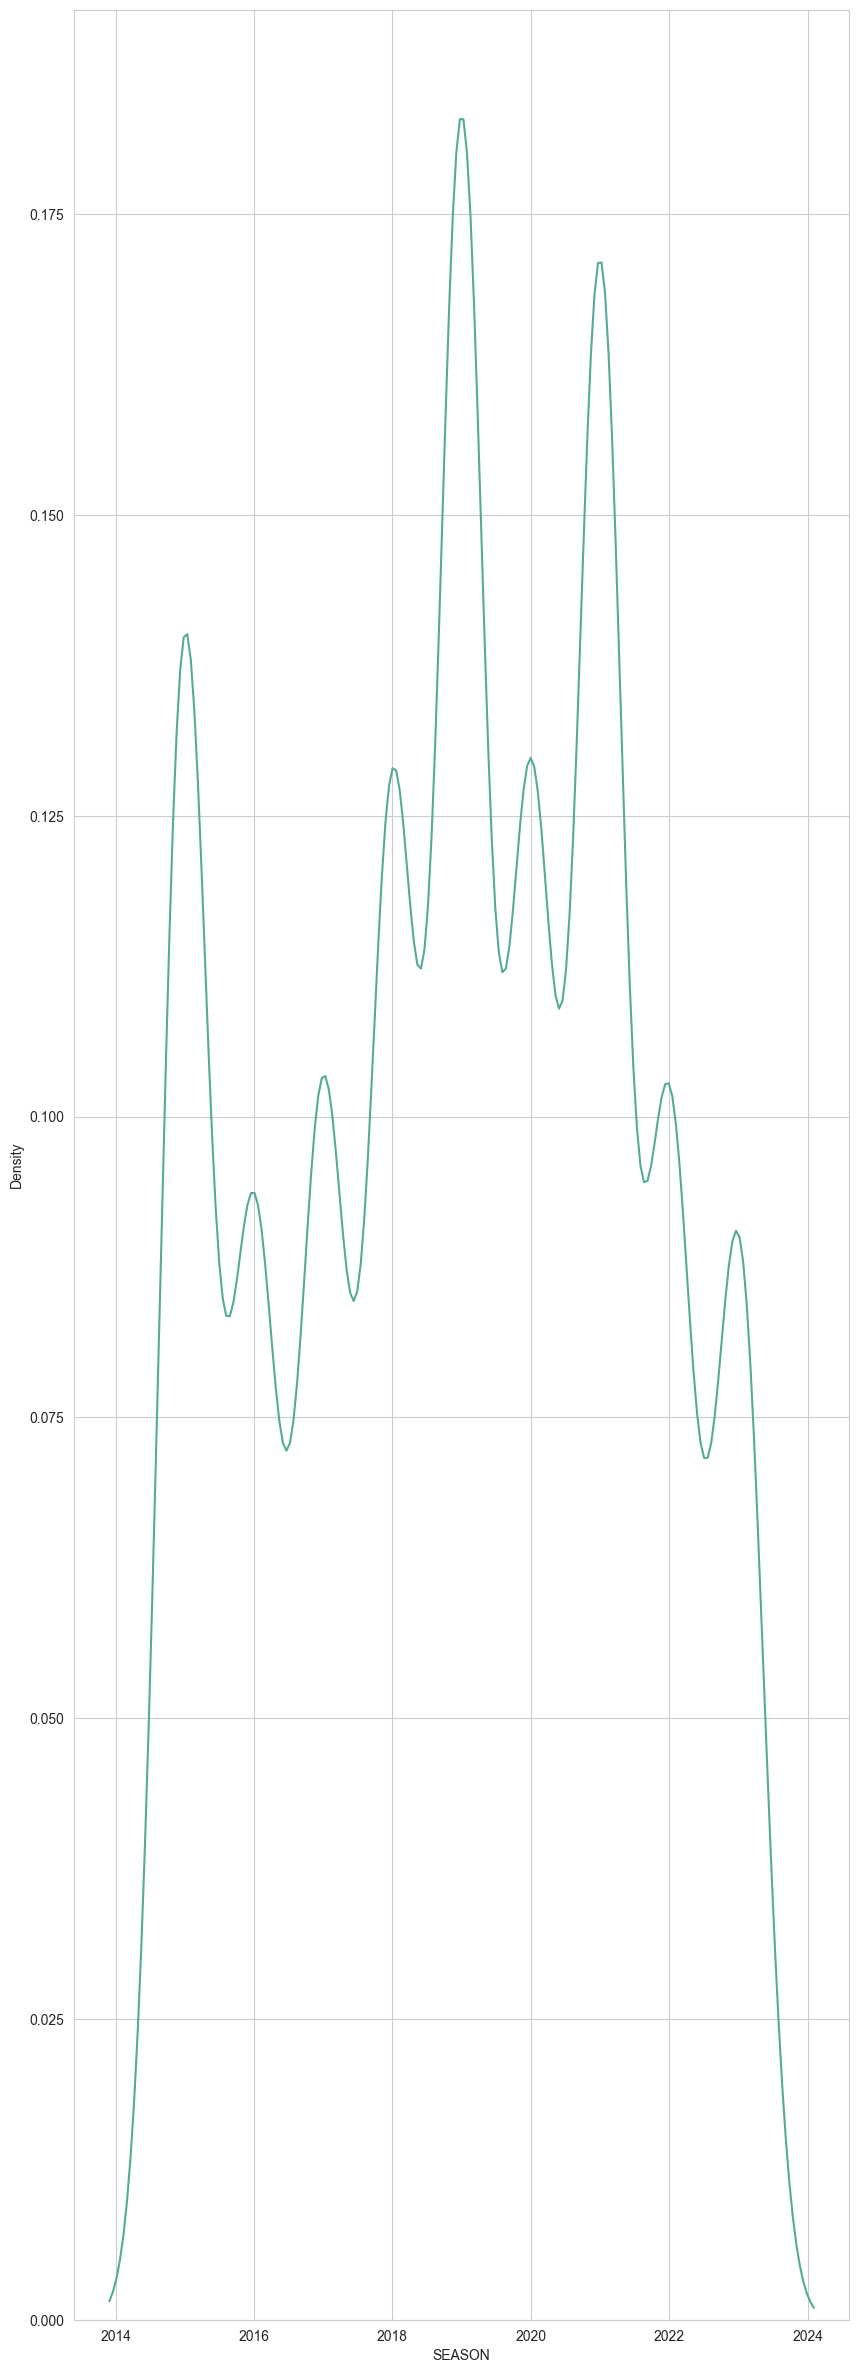

In [26]:
sns.kdeplot(data=weather_df, x='SEASON')

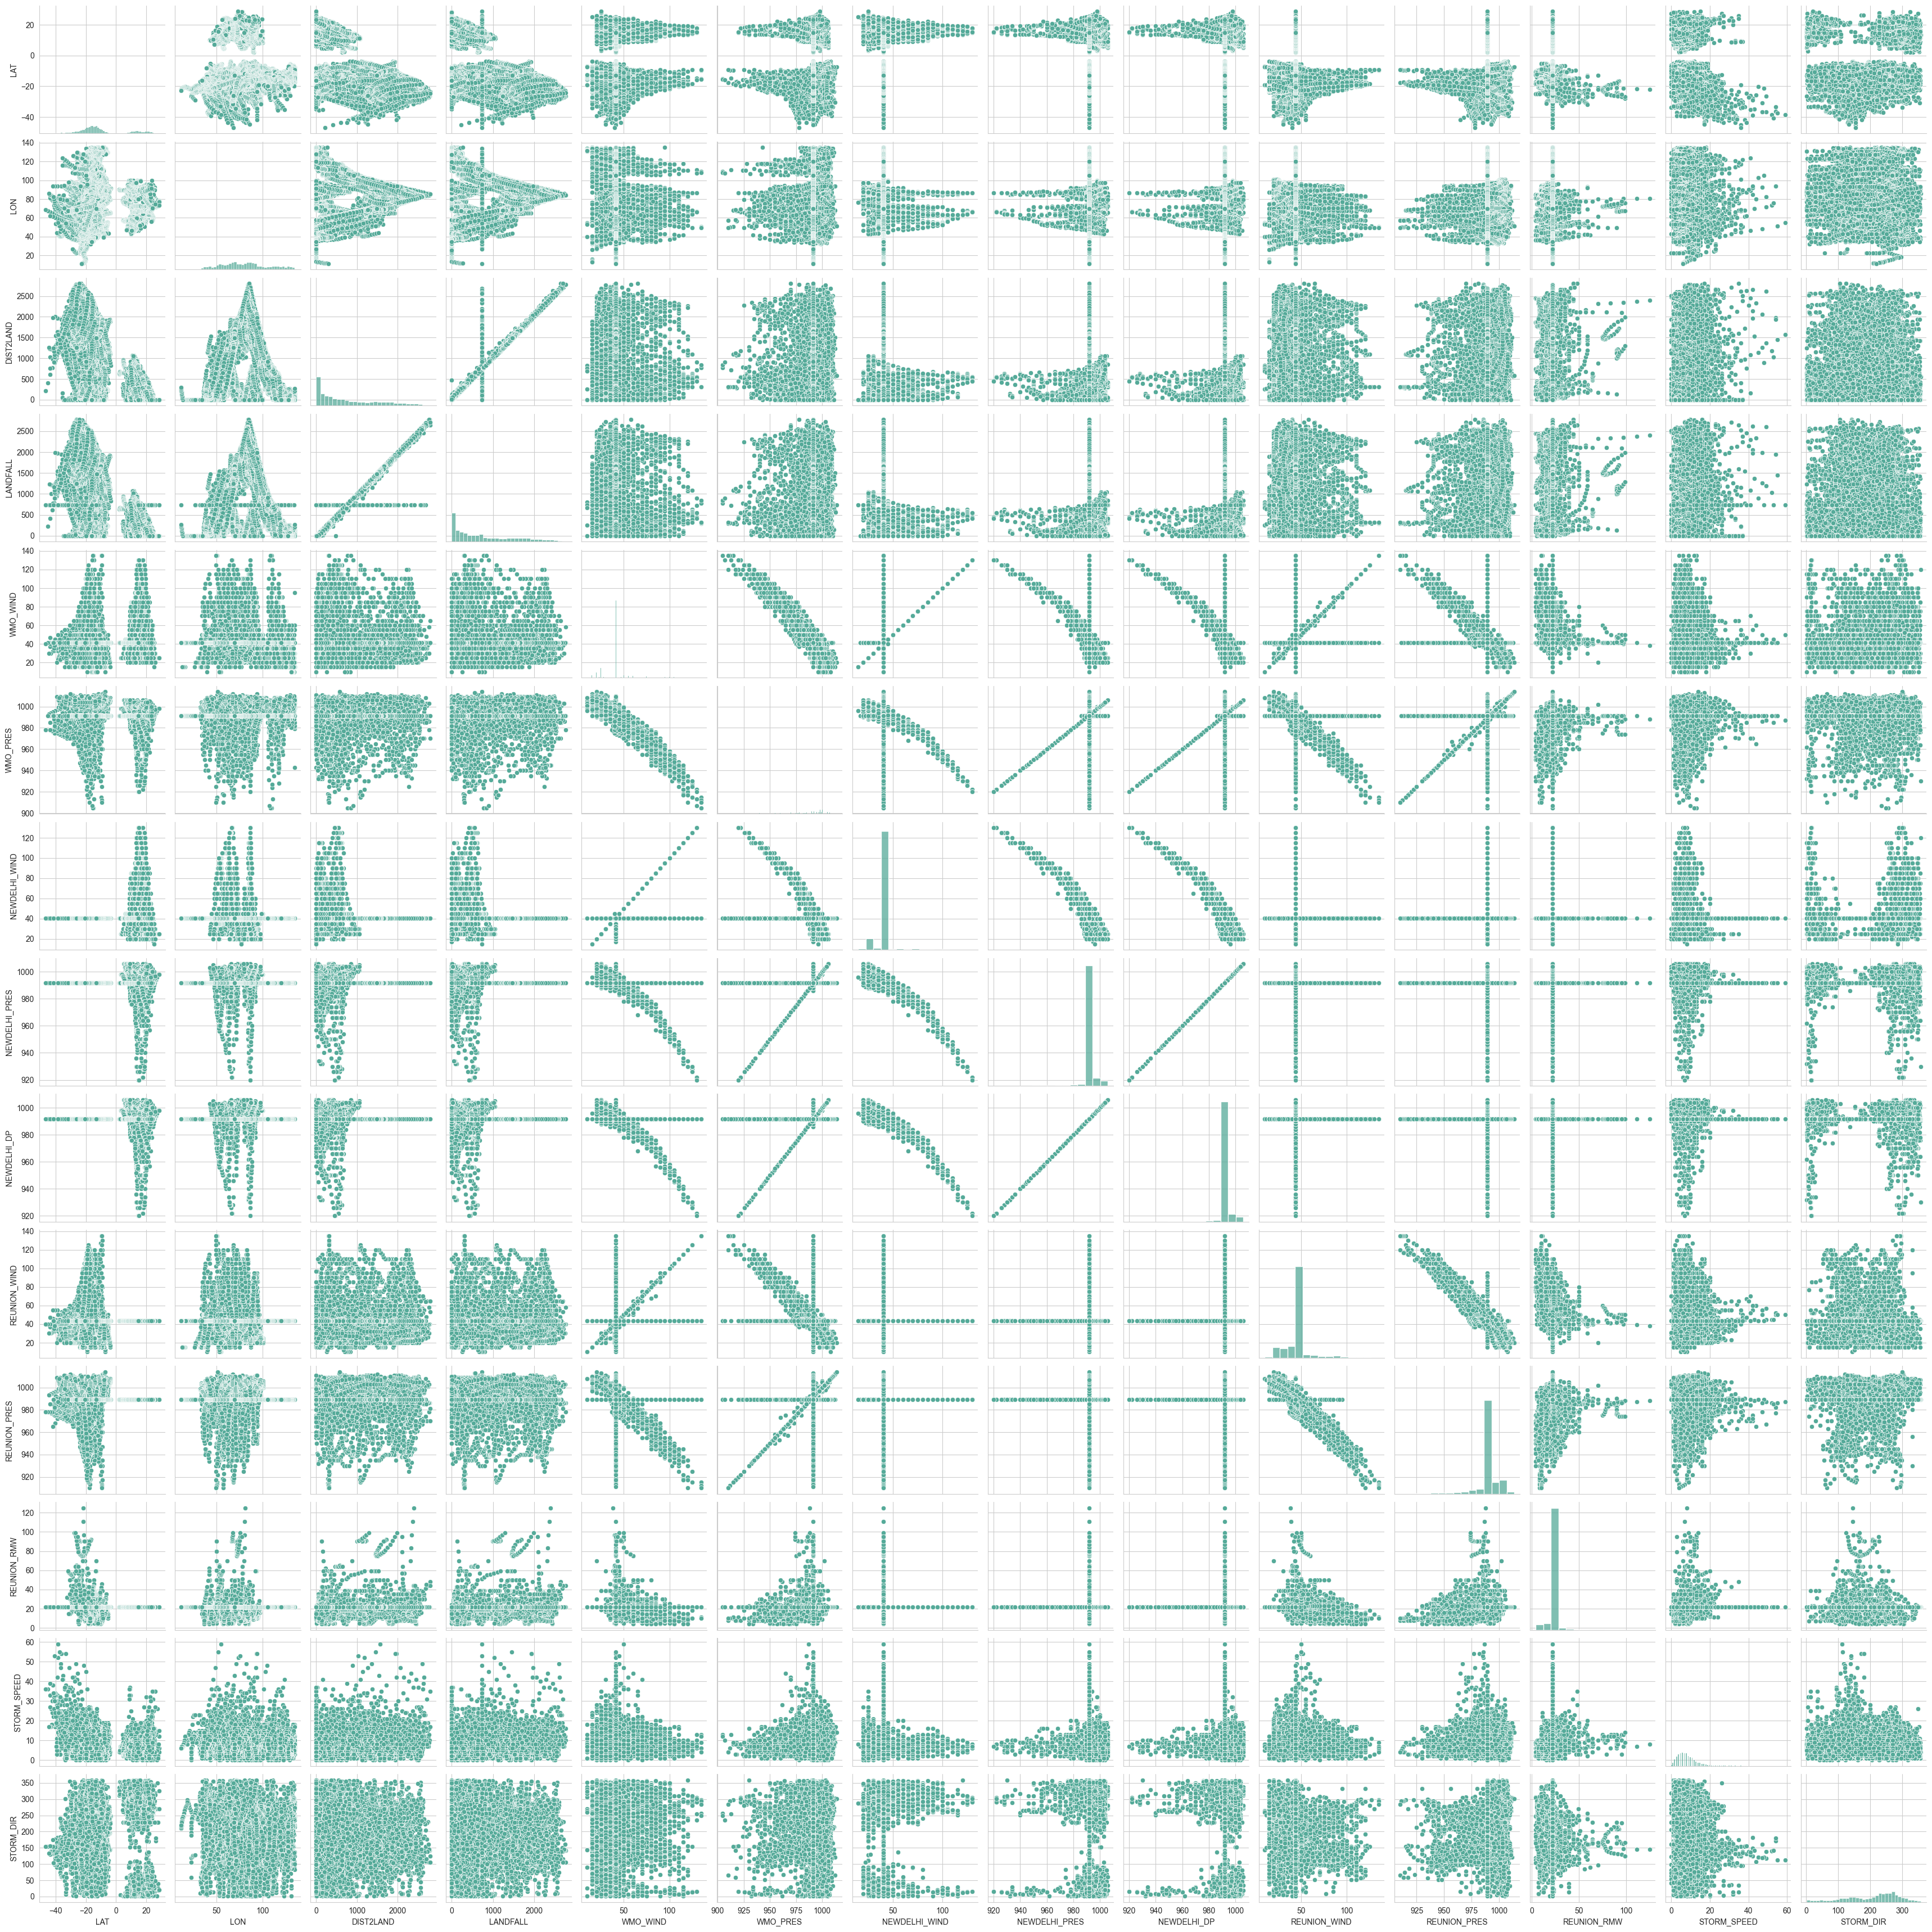

In [43]:
sns.pairplot(weather_df[weather_df['BASIN'].isin(BASINS)])

# Import Long and Lat in MAP

In [34]:
#install Shapely and geopandas libaray
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

C:\Users\vivek\AppData\Local\Temp\ipykernel_8772\2192436612.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  india = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

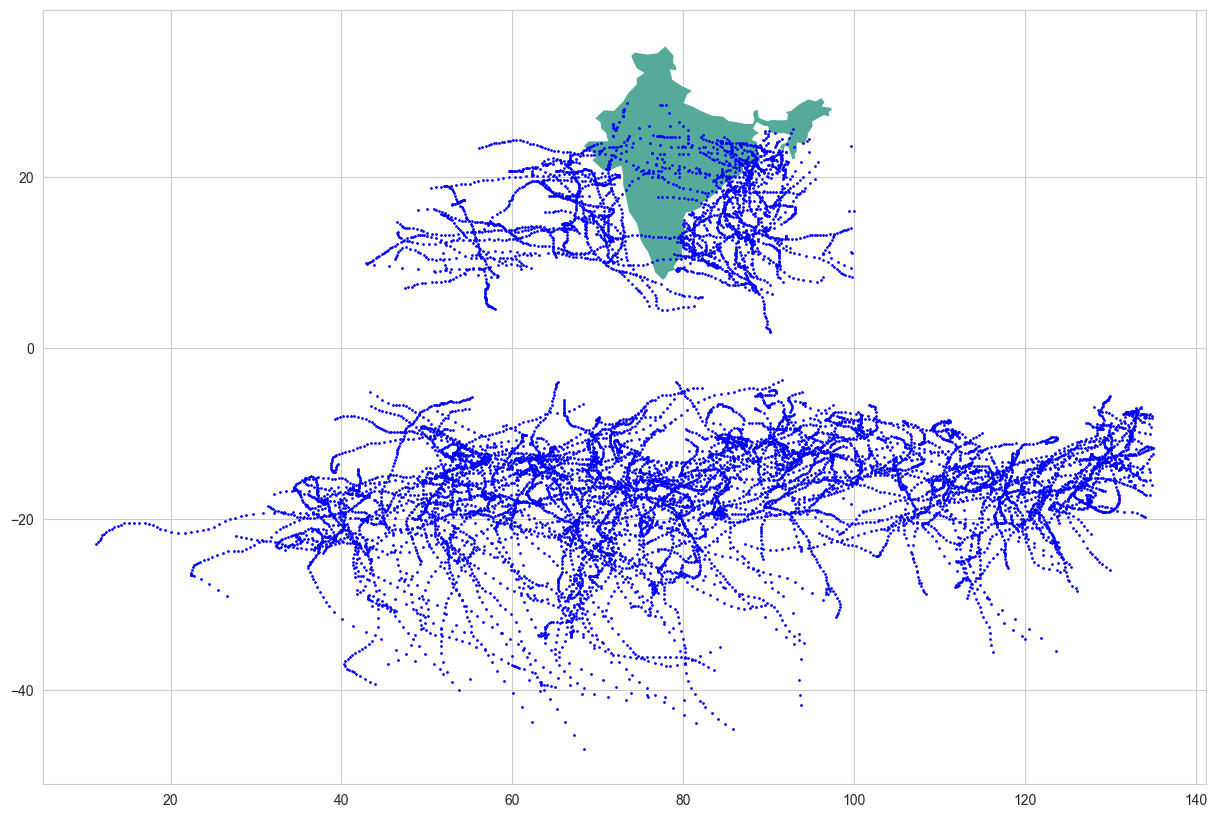

In [45]:
Sea_fall = weather_df[weather_df['BASIN'].isin(BASINS)]

Geo = [Point(xy) for xy in zip(Sea_fall['LON'], Sea_fall['LAT'])]
gdf = GeoDataFrame(Sea_fall, geometry = Geo)

#this is simple map that goes with geopandas

india = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
india = india[india.name=='India']
gdf.plot(ax=india.plot(figsize=(15,15)), marker='o', color='blue', markersize=1)

In [46]:
import plotly.express as px

fig = px.scatter_geo(Sea_fall, lat='LAT', lon='LON', hover_name='DIST2LAND',opacity = 1, size_max = 10  , projection = 'mercator', scope = 'asia' )
fig.update_layout(title='Weather Forcast, 2015-2023', title_x=1)
fig.show()

C:\Users\vivek\AppData\Local\Temp\ipykernel_8772\2561703438.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




AttributeError: PolyCollection.set() got an unexpected keyword argument 'height'

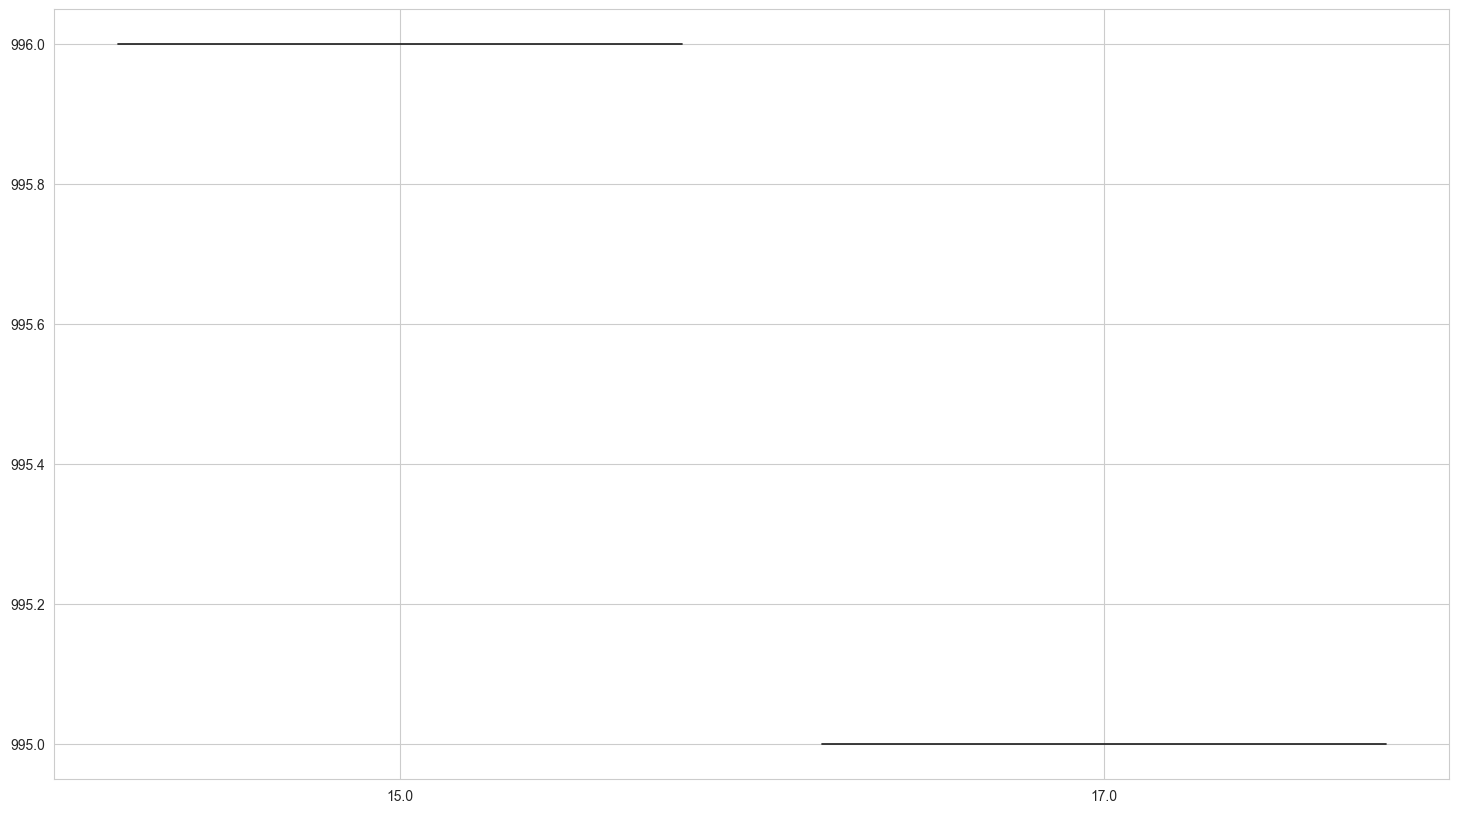

In [47]:
plt.figure(figsize=(18,10))
sns.violinplot(x="NEWDELHI_WIND", y="NEWDELHI_PRES", data=Sea_fall, height=20, ratio=5, palette="YlGnBu")
plt.show()

C:\Users\vivek\AppData\Local\Temp\ipykernel_8772\3674128180.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




AttributeError: PolyCollection.set() got an unexpected keyword argument 'height'

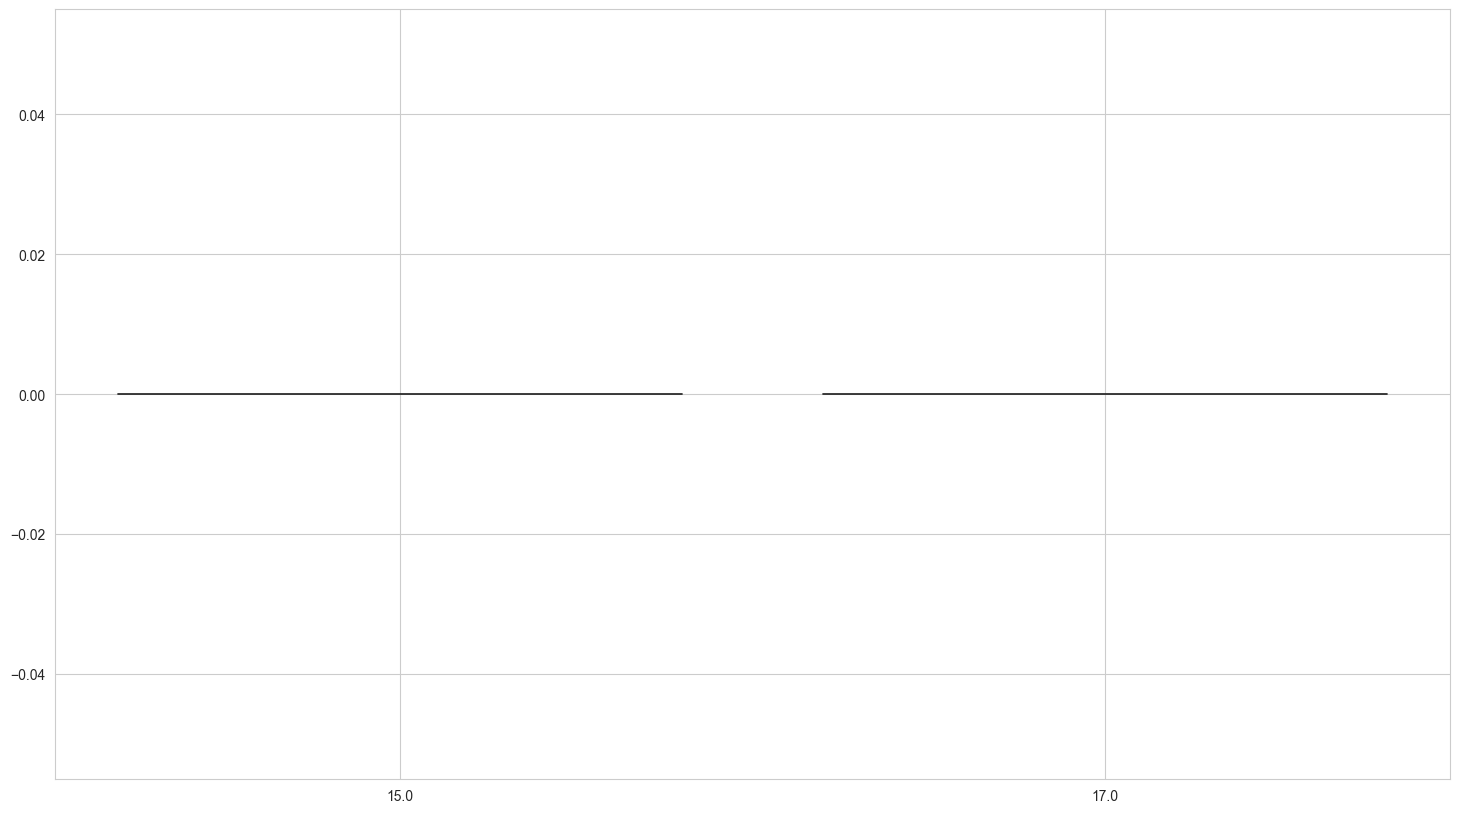

In [48]:
plt.figure(figsize=(18,10))
sns.violinplot(x="NEWDELHI_WIND", y="DIST2LAND", data=Sea_fall, height=20, ratio=5, palette="YlGnBu")
plt.show()

### Linear Regression

In [49]:
Sea_fall_df = weather_df.fillna(value=0)
    

In [51]:
Sea_fall_df.head()

BASIN SUBBASIN     NAME             ISO_TIME    LAT      LON  \
SEASON                                                                
2015      NI       AS  ASHOBAA  2015-06-06 06:00:00  13.10  68.5000   
2015      NI       AS  ASHOBAA  2015-06-06 09:00:00  13.45  68.5599   
2015      NI       AS  ASHOBAA  2015-06-06 12:00:00  13.80  68.6000   
2015      NI       AS  ASHOBAA  2015-06-06 15:00:00  14.15  68.6075   
2015      NI       AS  ASHOBAA  2015-06-06 18:00:00  14.50  68.6000   

        DIST2LAND  LANDFALL   WMO_WIND    WMO_PRES  NEWDELHI_WIND  \
SEASON                                                              
2015          624     601.0  41.300746  991.222042      40.558118   
2015          597     584.0  41.300746  991.222042      40.558118   
2015          584     571.0  41.300746  991.222042      40.558118   
2015          566     551.0  41.300746  991.222042      40.558118   
2015          551     538.0  41.300746  991.222042      40.558118   

        NEWDELHI_PRES  NEWDELHI_DP NEWDELHI_GRADE REUNION_TYPE  REUNION_WIND  \
SEASON                                                                         
2015       991.873412   991.873412             CS          UNK     43.471802   
2015       991.873412   991.873412             CS          UNK     43.471802   
2015       991.873412   991.873412             CS          UNK     43.471802   
2015       991.873412   991.873412             CS          UNK     43.471802   
2015       991.873412   991.873412             CS          UNK     43.471802   

        REUNION_PRES  REUNION_RMW  STORM_SPEED  STORM_DIR  
SEASON                                                     
2015      989.403054    21.626368            7        8.0  
2015      989.403054    21.626368            7        8.0  
2015      989.403054    21.626368            7        3.0  
2015      989.403054    21.626368            7      228.0  
2015      989.403054    21.626368            7      358.0

In [52]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

ls = linear_model.LinearRegression()

Xlr = Sea_fall_df["LANDFALL"].values.reshape(-1,1)
ylr = Sea_fall_df["STORM_SPEED"].values.reshape(-1,1)


X_train, X_test, y_train, y_test = train_test_split(Xlr, Xlr, test_size=0.4, random_state=1)



print(Xlr)
print(ylr)

[[ 601.        ]
 [ 584.        ]
 [ 571.        ]
 ...
 [1479.        ]
 [1478.        ]
 [ 733.50588834]]
[[7]
 [7]
 [7]
 ...
 [8]
 [6]
 [6]]


In [53]:
print("Linear Regression")
ls.fit(X_train, y_train)
print("alpha = ",ls.coef_[0])
print("beta = ",ls.intercept_)

Linear Regression
alpha =  [1.]
beta =  [3.29691829e-12]


In [54]:
print("\n\nCalculating some regression quality metrics")
y_pred = ls.predict(X_test)
print("MSE = ",mean_squared_error(y_test, y_pred))
print("R2 = ",r2_score(y_test, y_pred))



Calculating some regression quality metrics
MSE =  1.0417386732722773e-23
R2 =  1.0


C:\Users\vivek\AppData\Local\Temp\ipykernel_8772\2067027239.py:3: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



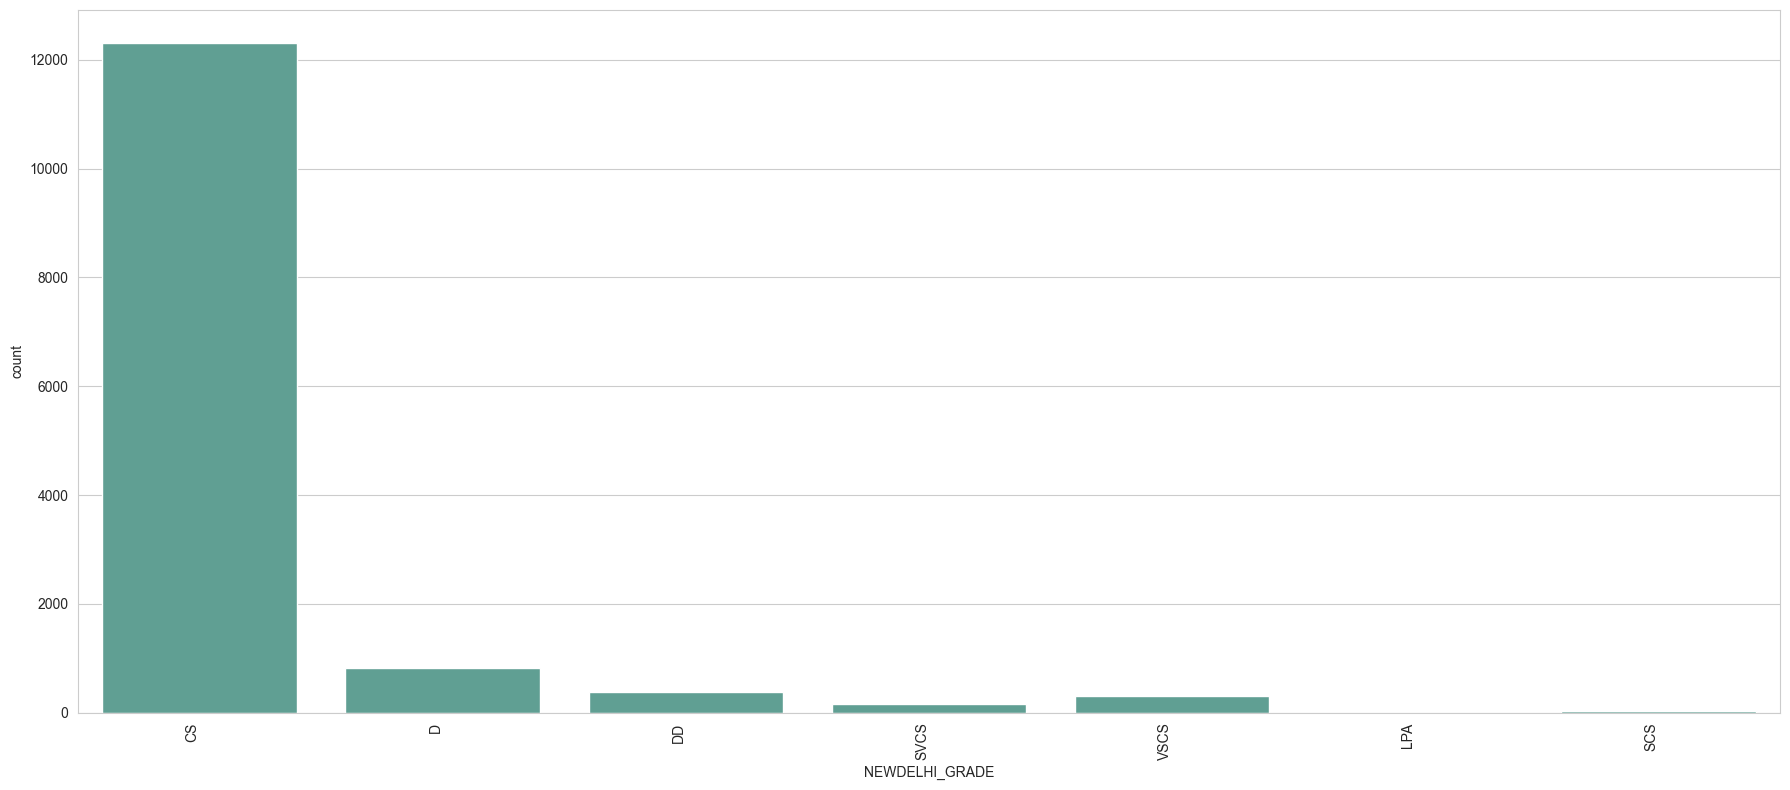

In [55]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.countplot(x=Sea_fall_df['NEWDELHI_GRADE'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

C:\Users\vivek\AppData\Local\Temp\ipykernel_8772\2421782040.py:3: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



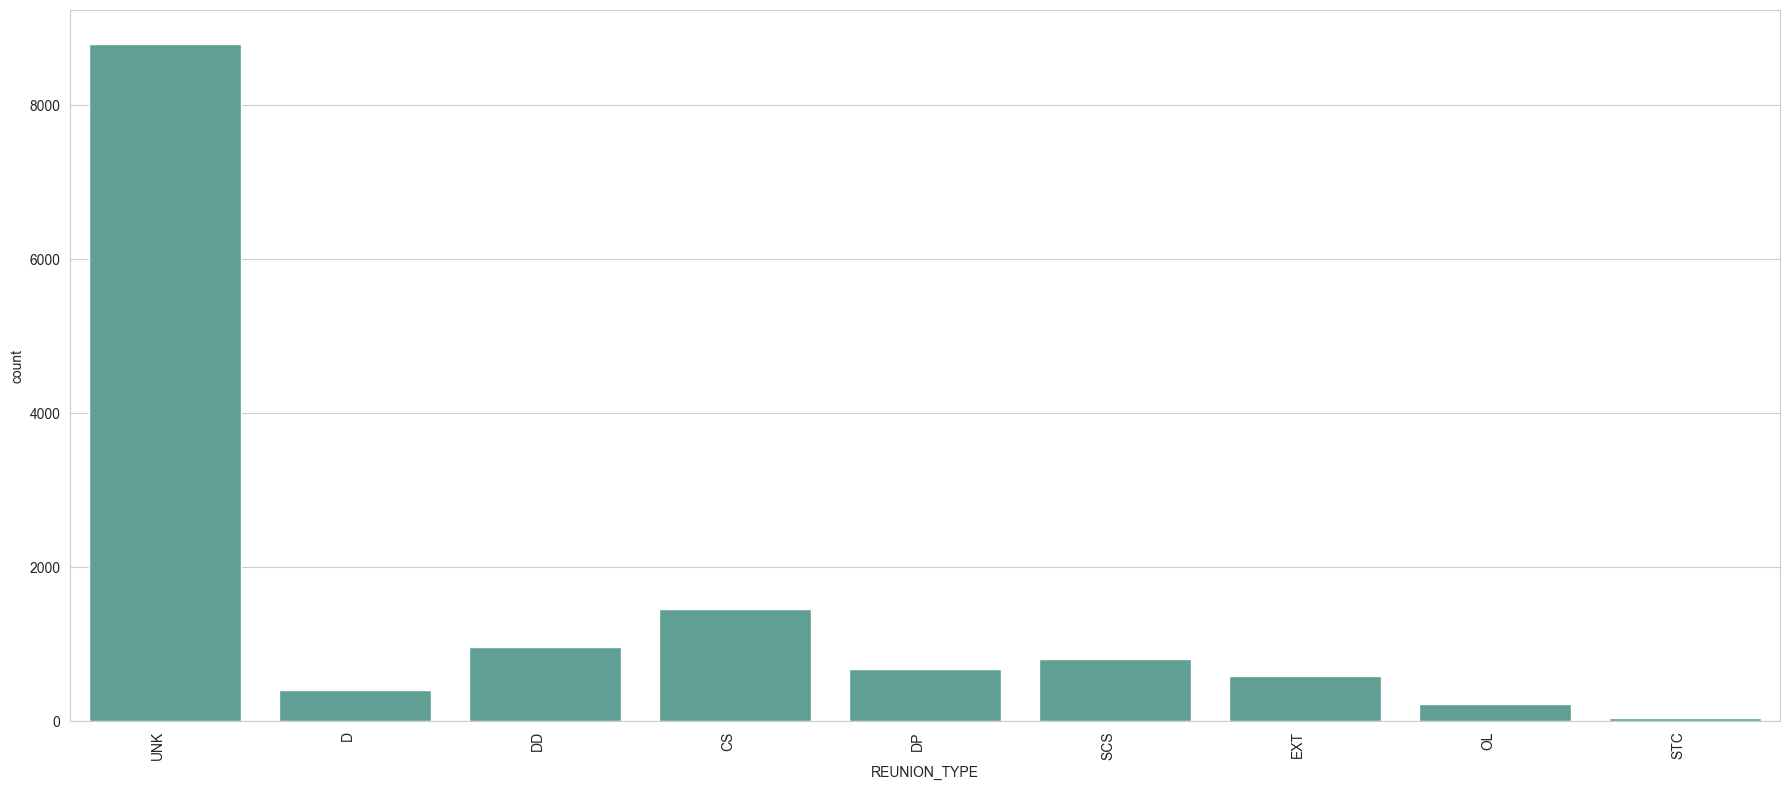

In [56]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.countplot(x=Sea_fall_df['REUNION_TYPE'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

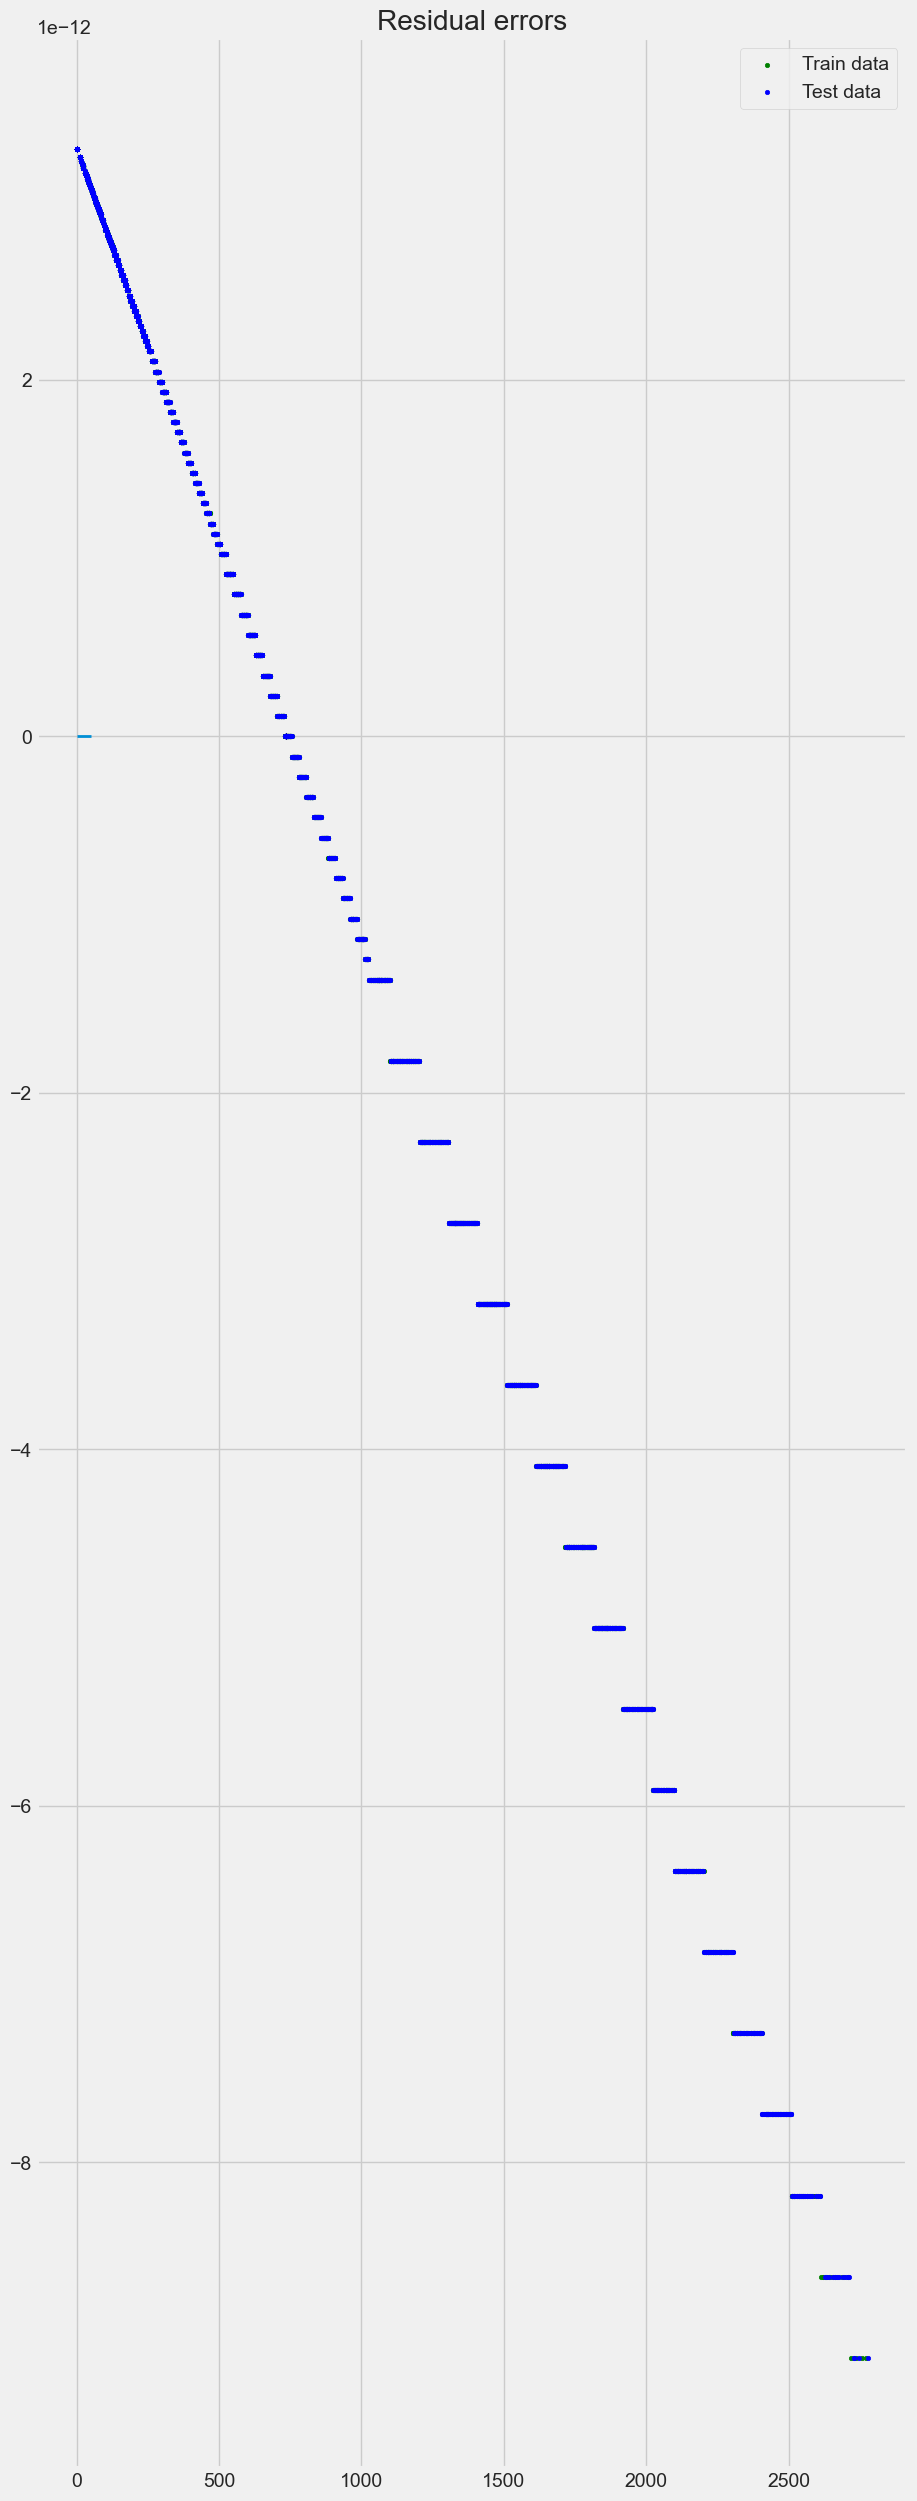

In [57]:
# plot for residual error

# setting plot style
plt.style.use('fivethirtyeight')

# plotting residual errors in training data
plt.scatter(ls.predict(X_train),
            ls.predict(X_train) - y_train,
            color="green", s=10,
            label='Train data')

# plotting residual errors in test data
plt.scatter(ls.predict(X_test),
            ls.predict(X_test) - y_test,
            color="blue", s=10,
            label='Test data')

# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)

# plotting legend
plt.legend(loc='upper right')
 
# plot title
plt.title("Residual errors")

# method call for showing the plot
plt.show()

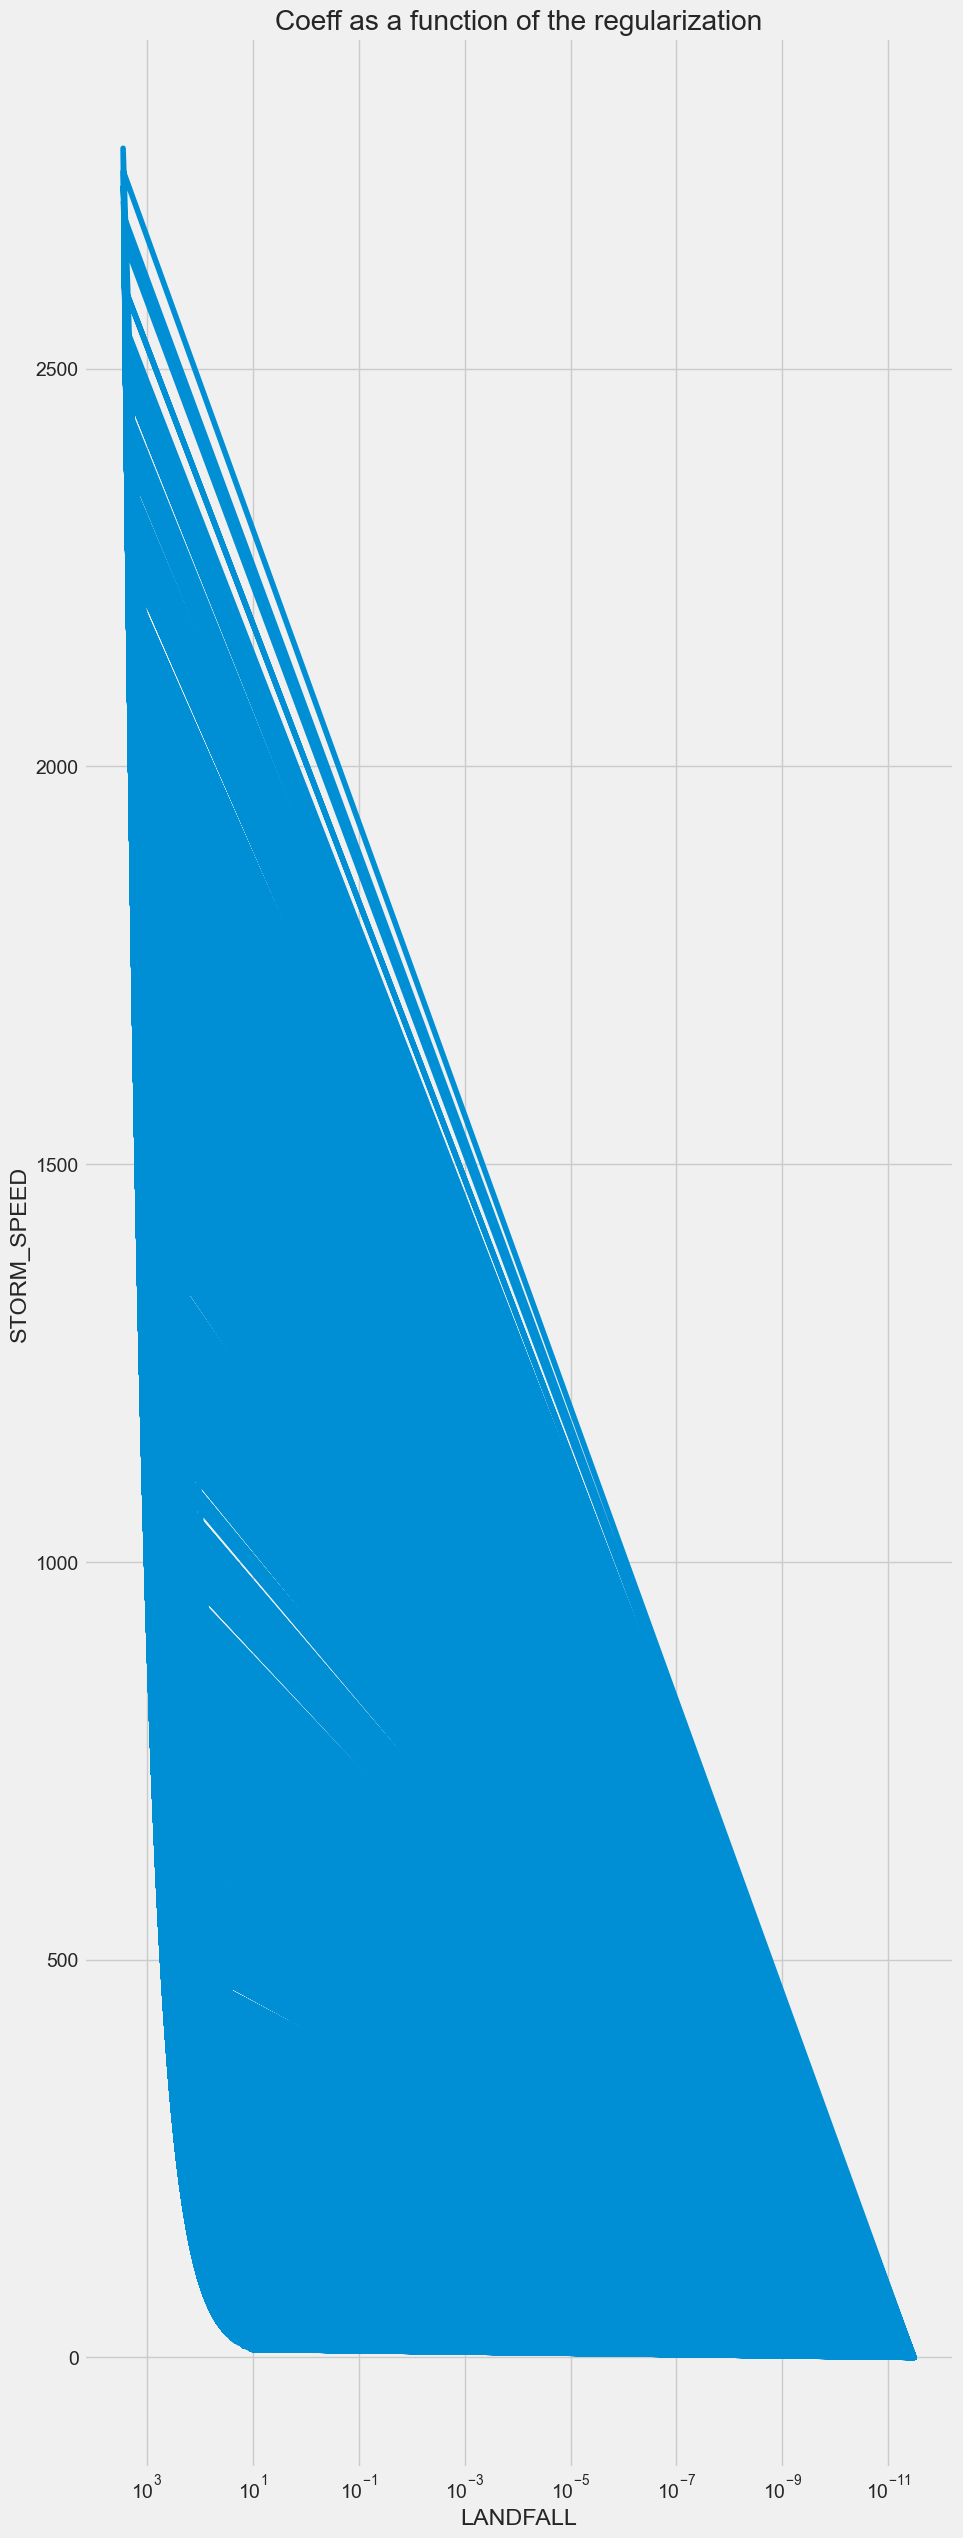

In [58]:
ax = plt.gca()

ax.plot(y_pred, X_test)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1]) #reverse axis
plt.xlabel("LANDFALL")
plt.ylabel("STORM_SPEED")
plt.title("Coeff as a function of the regularization")
plt.axis("tight")
plt.show()

## Polynomial Linear Regression

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(Xlr,ylr)

LinearRegression()

In [61]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg2=PolynomialFeatures(degree=2)
X_poly=poly_reg2.fit_transform(Xlr)
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly,ylr)

LinearRegression()

In [62]:
poly_reg3=PolynomialFeatures(degree=3)
X_poly3=poly_reg3.fit_transform(Xlr)
lin_reg_3=LinearRegression()
lin_reg_3.fit(X_poly3,ylr)

LinearRegression()

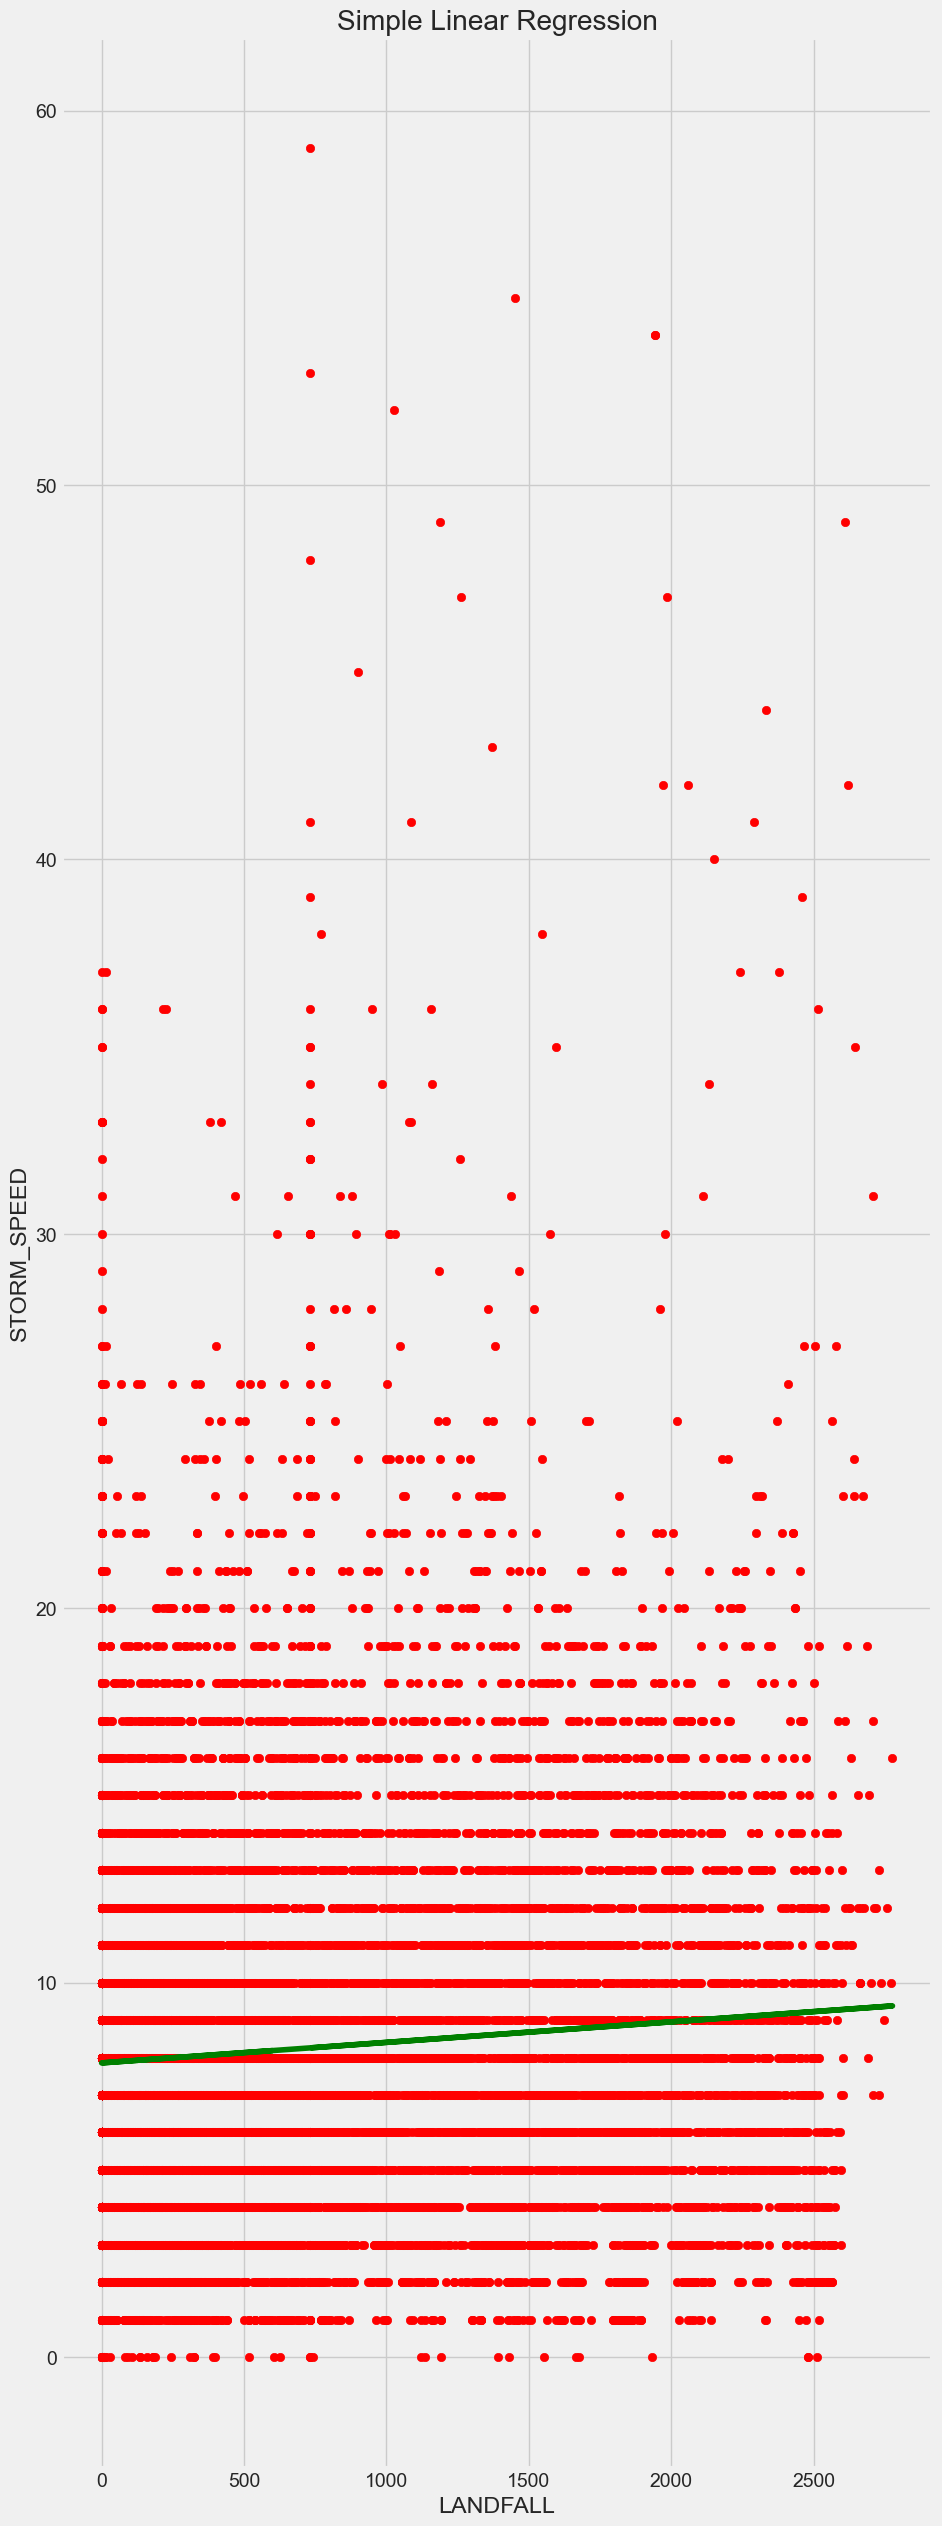

In [63]:
plt.scatter(Xlr,ylr,color='red')
plt.plot(Xlr,lin_reg.predict(Xlr),color='green')
plt.title('Simple Linear Regression')
plt.xlabel('LANDFALL')
plt.ylabel('STORM_SPEED')
plt.show()

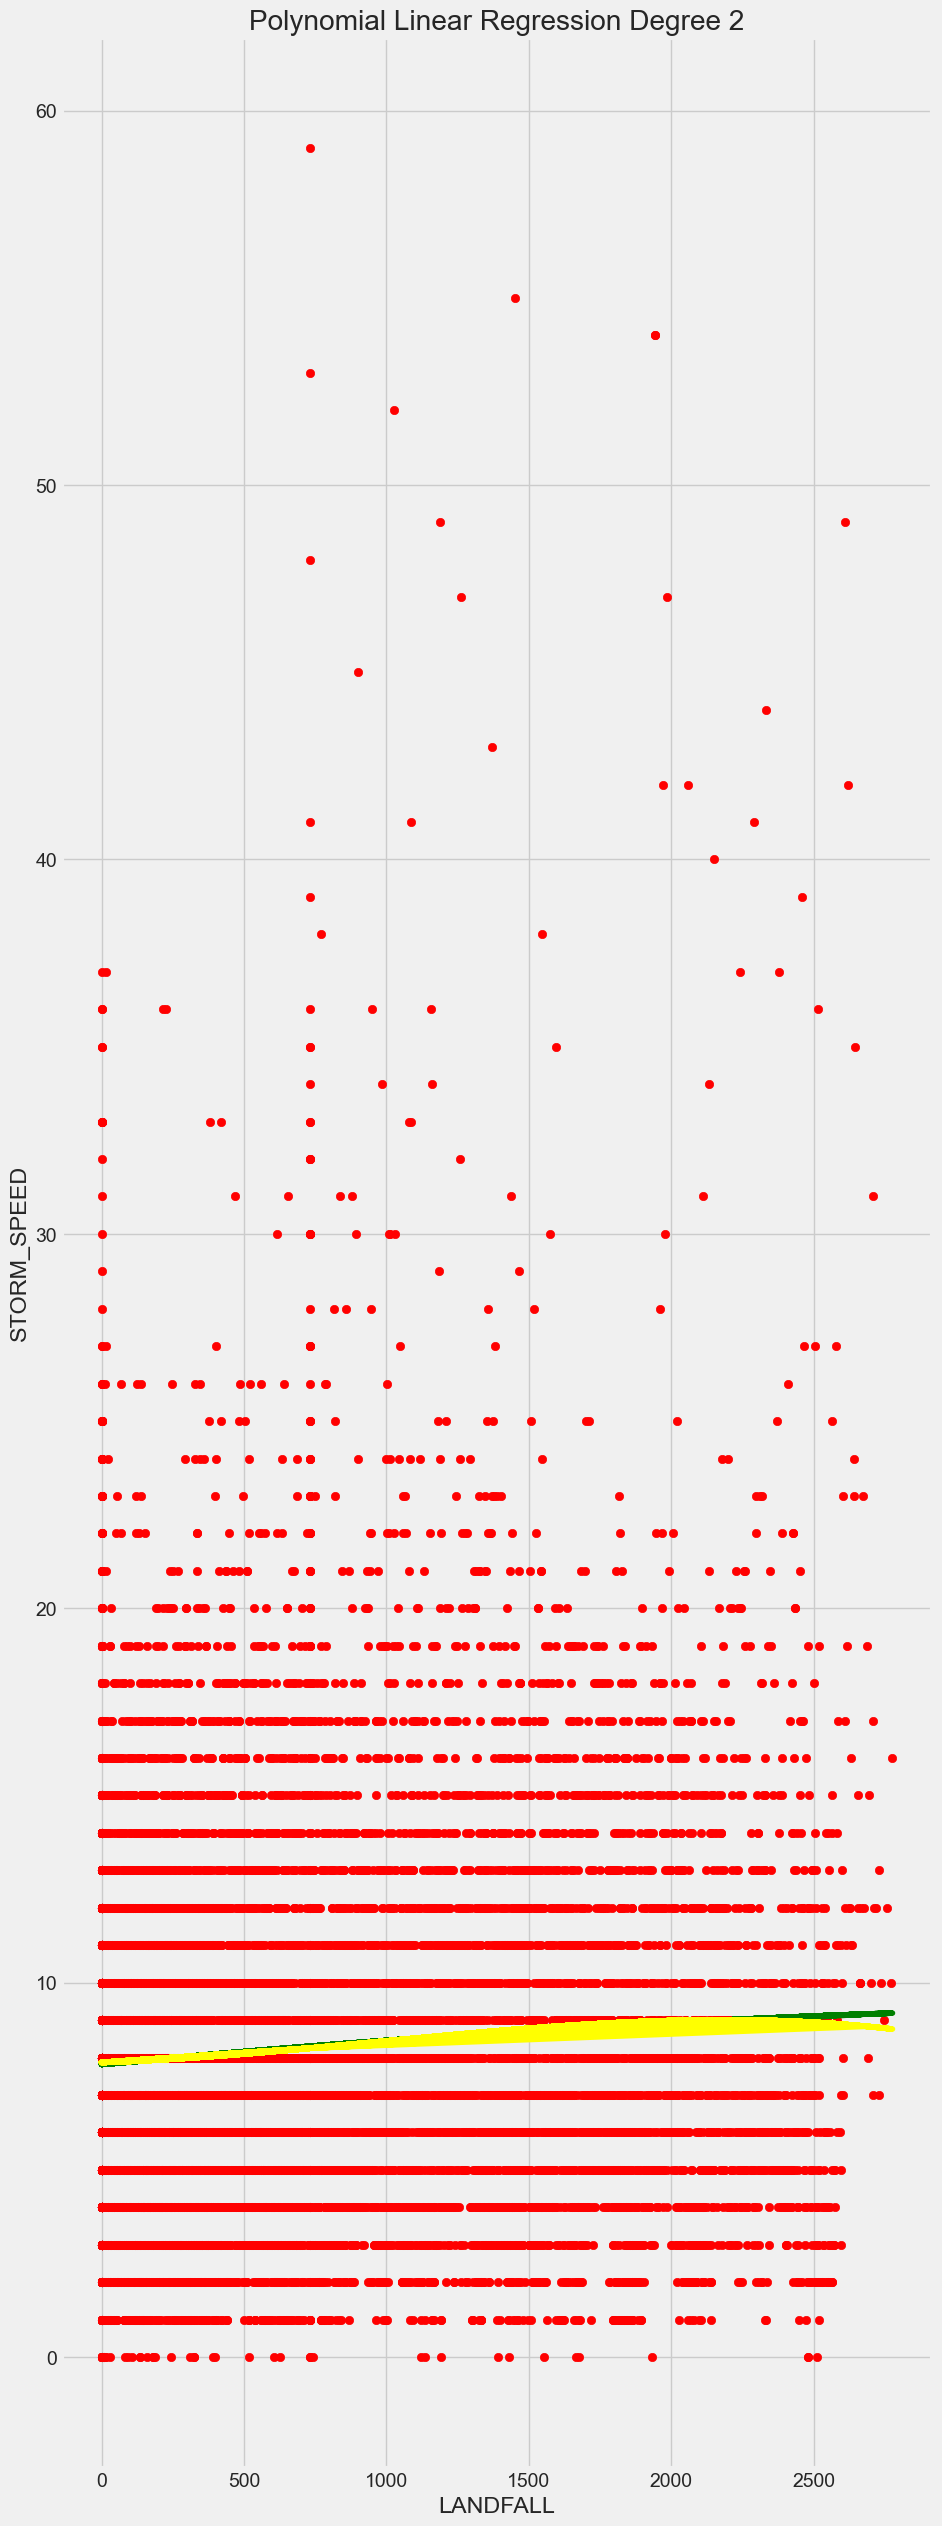

In [64]:
plt.style.use('fivethirtyeight')
plt.scatter(Xlr,ylr,color='red')
plt.plot(Xlr,lin_reg_2.predict(poly_reg2.fit_transform(Xlr)),color='green')
plt.plot(Xlr,lin_reg_3.predict(poly_reg3.fit_transform(Xlr)),color='yellow')
plt.title('Polynomial Linear Regression Degree 2')
plt.xlabel('LANDFALL')
plt.ylabel('STORM_SPEED')
plt.show()

C:\Users\vivek\AppData\Local\Temp\ipykernel_8772\3937182174.py:2: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



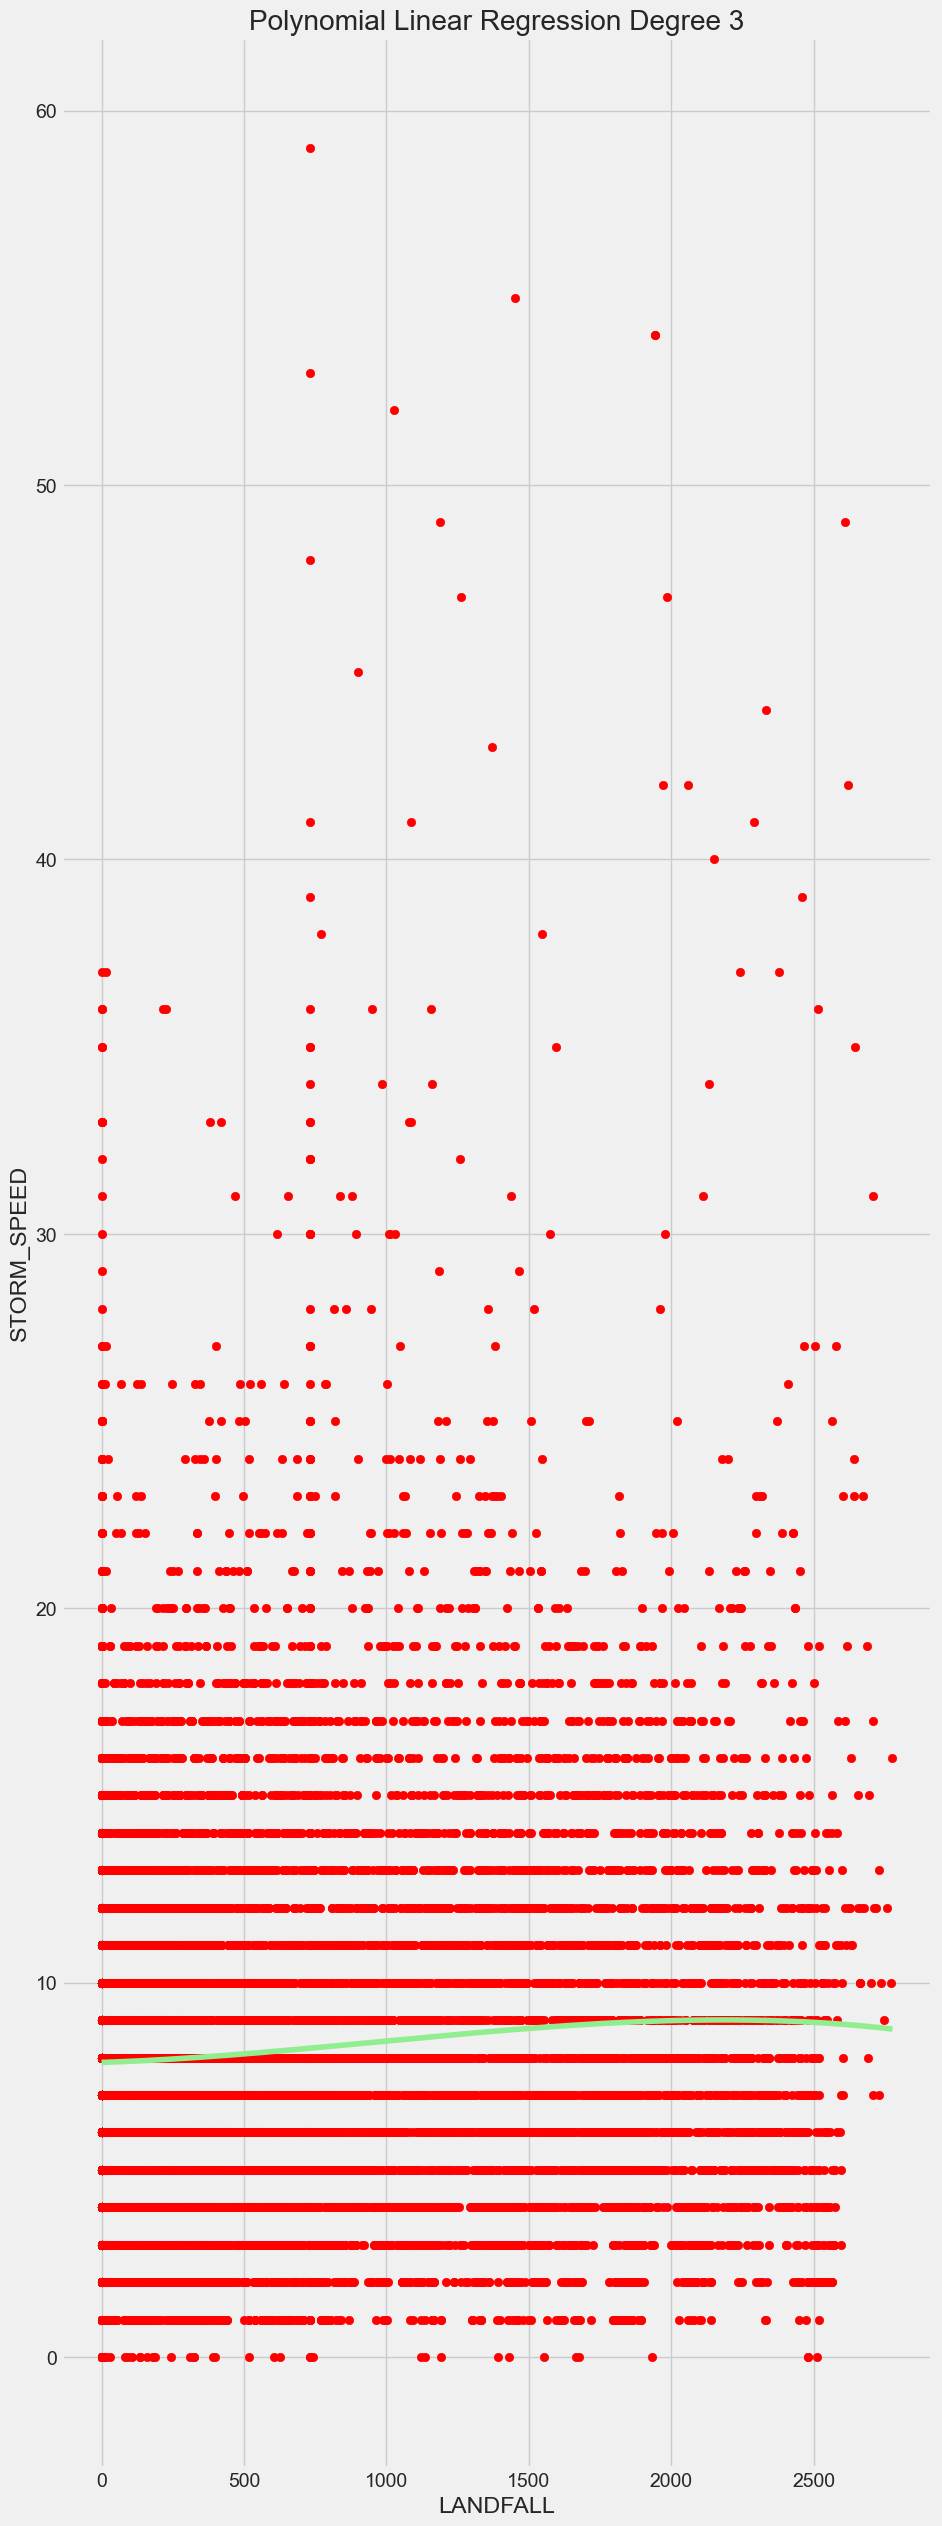

In [65]:
plt.style.use('fivethirtyeight')
X_grid=np.arange(min(Xlr),max(Xlr),0.1) # This will give us a vector.We will have to convert this into a matrix 
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(Xlr,ylr,color='red')
plt.plot(X_grid,lin_reg_3.predict(poly_reg3.fit_transform(X_grid)),color='lightgreen')
 
#plt.plot(X,lin_reg_3.predict(poly_reg3.fit_transform(X)),color='green')
plt.title('Polynomial Linear Regression Degree 3')
plt.xlabel('LANDFALL')
plt.ylabel('STORM_SPEED')
plt.show()

# Logistic Regression

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc,log_loss

In [69]:
Sea_fall_df['Results'] = np.where(Sea_fall_df['STORM_SPEED'] > 8 , 1,0 )

In [70]:
Xlo = Sea_fall_df[quantitative]
ylo = Sea_fall_df['Results']

X_train, X_test, y_train, y_test = train_test_split(Xlo, ylo, test_size=0.2, random_state=42)

In [72]:
Xlo[0:5]
ylo[0:5]

SEASON
2015    0
2015    0
2015    0
2015    0
2015    0
Name: Results, dtype: int32

In [73]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [75]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]
fprate, tprate, thresholds = roc_curve(y_test, y_pred, pos_label=1)

In [76]:
print(model.__class__.__name__+" accuracy is %2.5f" % accuracy_score(y_test, y_pred))

LogisticRegression accuracy is 1.00000


In [77]:
# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1694    0]
 [   0 1107]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1694
           1       1.00      1.00      1.00      1107

    accuracy                           1.00      2801
   macro avg       1.00      1.00      1.00      2801
weighted avg       1.00      1.00      1.00      2801



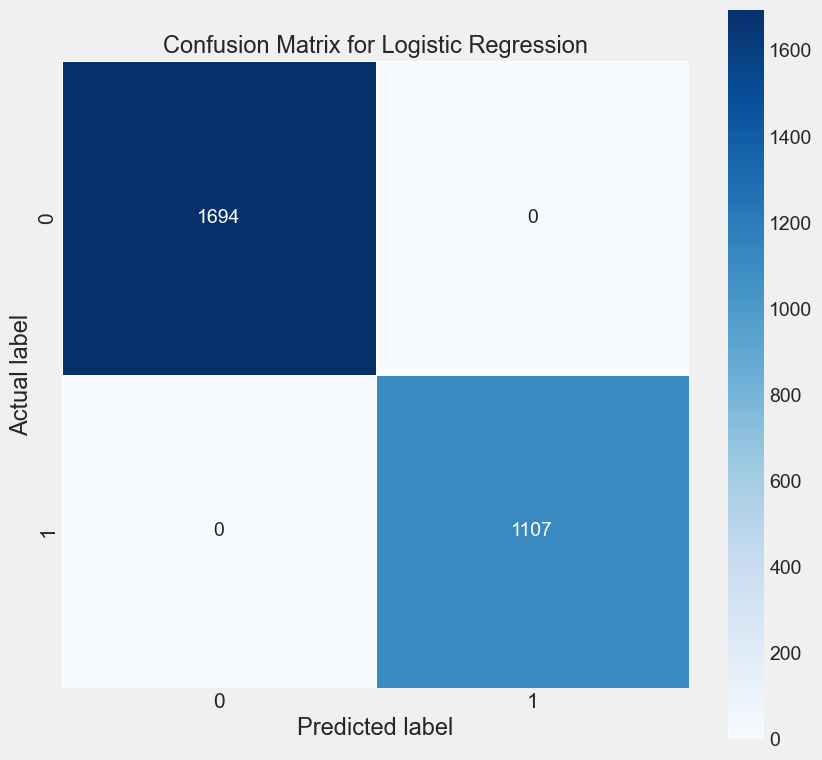

In [78]:
lscore = model.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Confusion Matrix for Logistic Regression'.format(lscore), size = 17);
plt.tick_params(labelsize= 15)

# Decision Tree

In [79]:
# Import Decision Tree Classifier.
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

# Import train-test split.
from sklearn.model_selection import train_test_split

# Import accuracy Score.
from sklearn.metrics import accuracy_score



In [80]:
# Form the model.
dt_dc = tree.DecisionTreeClassifier()

In [81]:
xdc = Sea_fall_df[quantitative]
ydc = Sea_fall_df['Results']

In [82]:
dt_dc = dt_dc.fit(xdc, ydc)

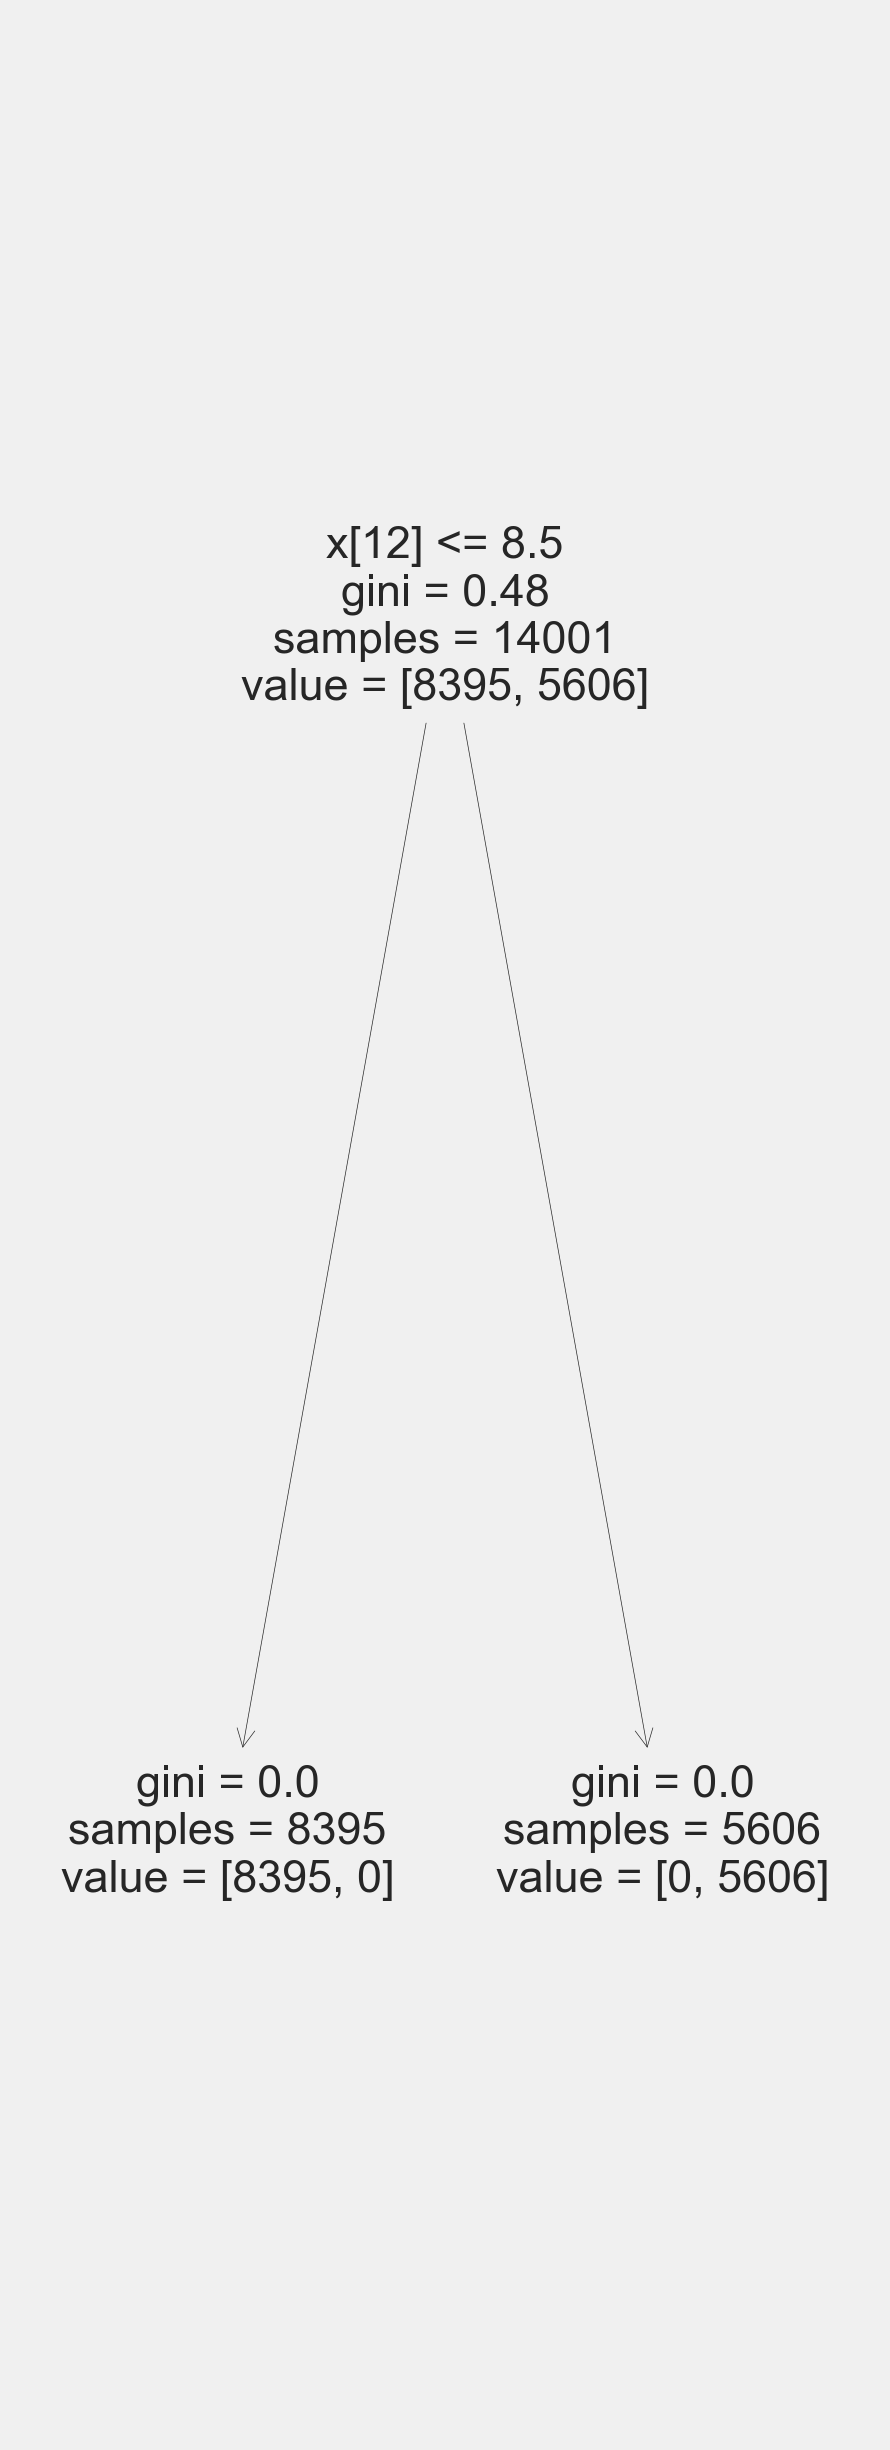

In [83]:
tree.plot_tree(dt_dc)
plt.show()

In [84]:
X_train, X_test, y_train, y_test = train_test_split(xdc, ydc, test_size=0.3, random_state=1)

In [85]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)




In [86]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [87]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [88]:
# Import Decision Tree Classifier.
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

p = tree.predict(X_test)
#scale the data (feature scaling)
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_val_scaled = sc.transform(X_test)

#Using Decision Tree Algorithm to the Training Set

tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train_scaled, y_train)

p_scaled = tree.predict(X_val_scaled)

In [89]:
p.mean()

0.3887169721494882

In [90]:
p_scaled.mean()

0.3887169721494882

# Random Forest

In [91]:
X_Rdf = Sea_fall_df[quantitative].iloc[:,4:5].values
Sea_fall_df[quantitative].info()

<class 'pandas.core.frame.DataFrame'>
Index: 14001 entries, 2015 to 2023
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LAT            14001 non-null  float64
 1   LON            14001 non-null  float64
 2   DIST2LAND      14001 non-null  int64  
 3   LANDFALL       14001 non-null  float64
 4   WMO_WIND       14001 non-null  float64
 5   WMO_PRES       14001 non-null  float64
 6   NEWDELHI_WIND  14001 non-null  float64
 7   NEWDELHI_PRES  14001 non-null  float64
 8   NEWDELHI_DP    14001 non-null  float64
 9   REUNION_WIND   14001 non-null  float64
 10  REUNION_PRES   14001 non-null  float64
 11  REUNION_RMW    14001 non-null  float64
 12  STORM_SPEED    14001 non-null  int64  
 13  STORM_DIR      14001 non-null  float64
dtypes: float64(12), int64(2)
memory usage: 1.6 MB


In [92]:
X_Rdf

array([[41.30074578],
       [41.30074578],
       [41.30074578],
       ...,
       [41.30074578],
       [41.30074578],
       [41.30074578]])

In [93]:
Sea_fall_df[quantitative].info()

<class 'pandas.core.frame.DataFrame'>
Index: 14001 entries, 2015 to 2023
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LAT            14001 non-null  float64
 1   LON            14001 non-null  float64
 2   DIST2LAND      14001 non-null  int64  
 3   LANDFALL       14001 non-null  float64
 4   WMO_WIND       14001 non-null  float64
 5   WMO_PRES       14001 non-null  float64
 6   NEWDELHI_WIND  14001 non-null  float64
 7   NEWDELHI_PRES  14001 non-null  float64
 8   NEWDELHI_DP    14001 non-null  float64
 9   REUNION_WIND   14001 non-null  float64
 10  REUNION_PRES   14001 non-null  float64
 11  REUNION_RMW    14001 non-null  float64
 12  STORM_SPEED    14001 non-null  int64  
 13  STORM_DIR      14001 non-null  float64
dtypes: float64(12), int64(2)
memory usage: 1.6 MB


In [94]:
y_Rdf = Sea_fall_df['Results']

In [95]:
y_Rdf

SEASON
2015    0
2015    0
2015    0
2015    0
2015    0
       ..
2023    0
2023    0
2023    0
2023    0
2023    0
Name: Results, Length: 14001, dtype: int32

In [96]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X_Rdf, y_Rdf, test_size= 0.25, random_state=0)  

In [97]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)   

In [98]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestRegressor 
regressor= RandomForestRegressor(n_estimators= 10, random_state=0)  
regressor.fit(x_train, y_train)  

RandomForestRegressor(n_estimators=10, random_state=0)

In [99]:
#Predicting the test set result  
y_pred= regressor.predict([[7.5]])  

In [100]:
print(y_pred)

[0.58912698]


In [101]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  

In [102]:
cm= confusion_matrix(X_Rdf, y_Rdf)

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [103]:
cm

array([[1694,    0],
       [   0, 1107]], dtype=int64)

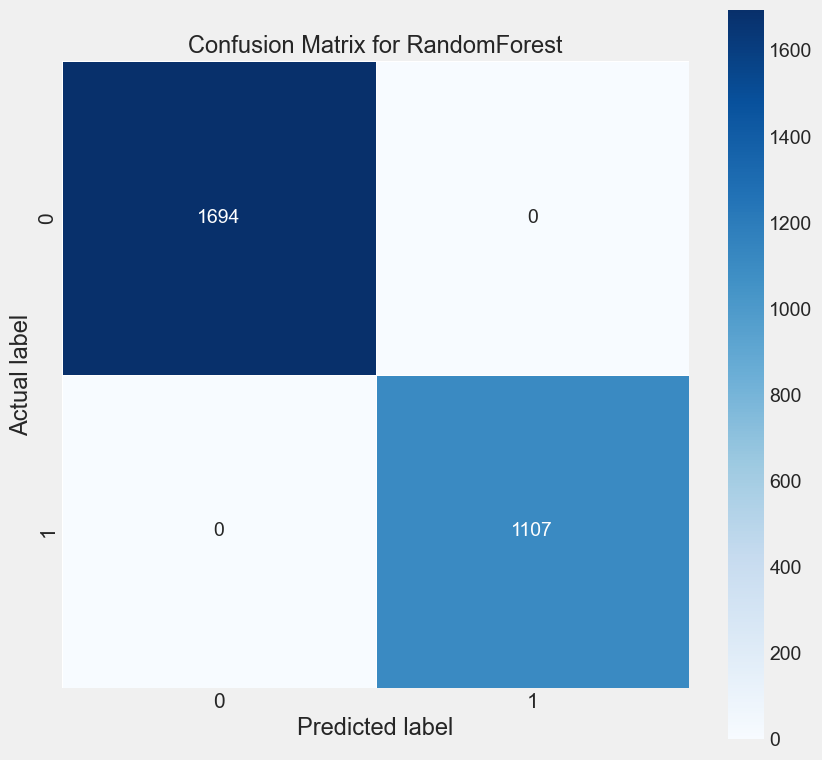

In [104]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Confusion Matrix for RandomForest', size = 17);
plt.tick_params(labelsize= 15)